**PM 2.5 Data (Bangkok only)**

PM2.5(2011).xlsx 1 station
Cells: N/A 150, Data 215

PM2.5(2012).xlsx 1 station
Cells: N/A 36, Data 330

PM2.5(2013).xlsx 1 station
Cells: N/A 99, Data 266 

PM2.5(2014).xlsx 2 stations
Cells: N/A 328, Data 402 

PM2.5(2015).xlsx 3 stations
Cells: N/A 145, Data 953 

PM2.5(2016).xlsx 5 stations
Cells: N/A 652, Data 1178 

PM2.5(2017).xlsx 7 stations
Cells: N/A 811, Data 1744

 PM2.5(2018).xlsx 10 stations
Cells: N/A 1222, Data 2428

PM2.5(2019).xlsx 12 stations
Cells: N/A 497, Data 3883

PM2.5(2020).xlsx 12 stations
Cells: N/A 58, Data 4334

PM2.5(2021).xlsx 12 stations
Cells: N/A 39, Data 4341

PM2.5(2022).xlsx 12 stations (up to 30/06/2022)
Cells: N/A 19, Data 2153

**PM 10 Data (Bangkok only)**

PM10(2011).xlsx 16 stations
Cells: N/A 2168, Data 3672

PM10(2012).xlsx 17 stations
Cells: N/A 2343, Data 3879

PM10(2013).xlsx 16 stations
Cells: N/A 887, Data 4953

PM10(2014).xlsx 16 stations
Cells: N/A 965, Data 4875

PM10(2015).xlsx 16 stations ** combined two 03T stations
Cells: N/A 1657, Data 4183

PM10(2016).xlsx 12 stations
Cells: N/A 1412, Data 2980

PM10(2017).xlsx 12 stations
Cells: N/A 1104, Data 3276

PM10(2018).xlsx 12 stations
Cells: N/A 1042, Data 3338

PM10(2019).xlsx 12 stations
Cells: N/A 318, Data 4062

PM10(2020).xlsx 12 stations
Cells: N/A 42, Data 4350

PM10(2021).xlsx 12 stations
Cells: N/A 48, Data 4332

PM10(2022).xlsx 12 stations (up to 30/06/2022)
Cells: N/A 353, Data 1819



#### **Dealing with N/A**

There are three types of missing values: 
- missing completely at random, which means that there is no pattern among the missing values, 
- missing at random, which means that there is a pattern in the missing values but this pattern is not related to the dependent variable 
- missing not at random, which means that there is a pattern in the missing values that is related to the dependent variable.

How to solve

- If most of the column, drop that column
- Guess with reasons
- mean, median, or mode for a continuous variable, or the mode for a categorical variable

Ref: https://medium.com/@dkatzman_3920/how-to-deal-with-missing-or-na-values-in-the-dataset-7d8f1693450d


# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import auth
auth.authenticate_user()

%matplotlib inline 
# %config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

# PM 2.5
Some column names have space behind its name (not spacebar), we have to manually delete it in XLSX.

In [ ]:
# Run this block to initiate variables of both PM2.5 and PM10
# DONT NEED TO RUN THIS BLOCK ANYMORE, RUN BLOCK BELOW INSTEAD (LINKED TO GCP)

# pm25_2011 = pd.read_excel("/content/PM2.5(2011).xlsx")
# pm25_2012 = pd.read_excel("/content/PM2.5(2012).xlsx")
# pm25_2013 = pd.read_excel("/content/PM2.5(2013).xlsx")
# pm25_2014 = pd.read_excel("/content/PM2.5(2014).xlsx")
# pm25_2015 = pd.read_excel("/content/PM2.5(2015).xlsx")
# pm25_2016 = pd.read_excel("/content/PM2.5(2016).xlsx")
# pm25_2017 = pd.read_excel("/content/PM2.5(2017).xlsx")
# pm25_2018 = pd.read_excel("/content/PM2.5(2018).xlsx")
# pm25_2019 = pd.read_excel("/content/PM2.5(2019).xlsx")
# pm25_2020 = pd.read_excel("/content/PM2.5(2020).xlsx")
# pm25_2021 = pd.read_excel("/content/PM2.5(2021).xlsx")
# pm25_2022 = pd.read_excel("/content/PM2.5(2022).xlsx")

# pm10_2011 = pd.read_excel("/content/PM10(2011).xlsx")
# pm10_2012 = pd.read_excel("/content/PM10(2012).xlsx")
# pm10_2013 = pd.read_excel("/content/PM10(2013).xlsx")
# pm10_2014 = pd.read_excel("/content/PM10(2014).xlsx")
# pm10_2015 = pd.read_excel("/content/PM10(2015).xlsx")
# pm10_2016 = pd.read_excel("/content/PM10(2016).xlsx")
# pm10_2017 = pd.read_excel("/content/PM10(2017).xlsx")
# pm10_2018 = pd.read_excel("/content/PM10(2018).xlsx")
# pm10_2019 = pd.read_excel("/content/PM10(2019).xlsx")
# pm10_2020 = pd.read_excel("/content/PM10(2020).xlsx")
# pm10_2021 = pd.read_excel("/content/PM10(2021).xlsx")
# pm10_2022 = pd.read_excel("/content/PM10(2022).xlsx")

In [ ]:
project_id = 'caramel-source-320407'

from google.cloud import bigquery

client = bigquery.Client(project=project_id)
dataset_ref = client.dataset("breath_dataset", project=project_id)
dataset = client.get_dataset(dataset_ref)

In [ ]:
tables = list(client.list_tables(dataset))

for table in tables:
  print(table.table_id)

pm10_2011
pm10_2012
pm10_2013
pm10_2014
pm10_2015
pm10_2016
pm10_2017
pm10_2018
pm10_2019
pm10_2020
pm10_2021
pm10_2022
pm25_2011
pm25_2012
pm25_2013
pm25_2014
pm25_2015
pm25_2016
pm25_2017
pm25_2018
pm25_2019
pm25_2020
pm25_2021
pm25_2022


In [ ]:
pm10_2011 = client.get_table(dataset_ref.table("pm10_2011"))
pm10_2012 = client.get_table(dataset_ref.table("pm10_2012"))
pm10_2013 = client.get_table(dataset_ref.table("pm10_2013"))
pm10_2014 = client.get_table(dataset_ref.table("pm10_2014"))
pm10_2015 = client.get_table(dataset_ref.table("pm10_2015"))
pm10_2016 = client.get_table(dataset_ref.table("pm10_2016"))
pm10_2017 = client.get_table(dataset_ref.table("pm10_2017"))
pm10_2018 = client.get_table(dataset_ref.table("pm10_2018"))
pm10_2019 = client.get_table(dataset_ref.table("pm10_2019"))
pm10_2020 = client.get_table(dataset_ref.table("pm10_2020"))
pm10_2021 = client.get_table(dataset_ref.table("pm10_2021"))
pm10_2022 = client.get_table(dataset_ref.table("pm10_2022"))

pm25_2011 = client.get_table(dataset_ref.table("pm25_2011"))
pm25_2012 = client.get_table(dataset_ref.table("pm25_2012"))
pm25_2013 = client.get_table(dataset_ref.table("pm25_2013"))
pm25_2014 = client.get_table(dataset_ref.table("pm25_2014"))
pm25_2015 = client.get_table(dataset_ref.table("pm25_2015"))
pm25_2016 = client.get_table(dataset_ref.table("pm25_2016"))
pm25_2017 = client.get_table(dataset_ref.table("pm25_2017"))
pm25_2018 = client.get_table(dataset_ref.table("pm25_2018"))
pm25_2019 = client.get_table(dataset_ref.table("pm25_2019"))
pm25_2020 = client.get_table(dataset_ref.table("pm25_2020"))
pm25_2021 = client.get_table(dataset_ref.table("pm25_2021"))
pm25_2022 = client.get_table(dataset_ref.table("pm25_2022"))

# pm10_2011.schema

In [ ]:
pm10_2011 = client.list_rows(pm10_2011).to_dataframe()
pm10_2012 = client.list_rows(pm10_2012).to_dataframe()
pm10_2013 = client.list_rows(pm10_2013).to_dataframe()
pm10_2014 = client.list_rows(pm10_2014).to_dataframe()
pm10_2015 = client.list_rows(pm10_2015).to_dataframe()
pm10_2016 = client.list_rows(pm10_2016).to_dataframe()
pm10_2017 = client.list_rows(pm10_2017).to_dataframe()
pm10_2018 = client.list_rows(pm10_2018).to_dataframe()
pm10_2019 = client.list_rows(pm10_2019).to_dataframe()
pm10_2020 = client.list_rows(pm10_2020).to_dataframe()
pm10_2021 = client.list_rows(pm10_2021).to_dataframe()
pm10_2022 = client.list_rows(pm10_2022).to_dataframe()

pm25_2011 = client.list_rows(pm25_2011).to_dataframe()
pm25_2012 = client.list_rows(pm25_2012).to_dataframe()
pm25_2013 = client.list_rows(pm25_2013).to_dataframe()
pm25_2014 = client.list_rows(pm25_2014).to_dataframe()
pm25_2015 = client.list_rows(pm25_2015).to_dataframe()
pm25_2016 = client.list_rows(pm25_2016).to_dataframe()
pm25_2017 = client.list_rows(pm25_2017).to_dataframe()
pm25_2018 = client.list_rows(pm25_2018).to_dataframe()
pm25_2019 = client.list_rows(pm25_2019).to_dataframe()
pm25_2020 = client.list_rows(pm25_2020).to_dataframe()
pm25_2021 = client.list_rows(pm25_2021).to_dataframe()
pm25_2022 = client.list_rows(pm25_2022).to_dataframe()

In [ ]:
pm10_2011.columns = pm10_2011.columns.str.replace("_", "")
pm10_2012.columns = pm10_2012.columns.str.replace("_", "")
pm10_2013.columns = pm10_2013.columns.str.replace("_", "")
pm10_2014.columns = pm10_2014.columns.str.replace("_", "")
pm10_2015.columns = pm10_2015.columns.str.replace("_", "")
pm10_2016.columns = pm10_2016.columns.str.replace("_", "")
pm10_2017.columns = pm10_2017.columns.str.replace("_", "")
pm10_2018.columns = pm10_2018.columns.str.replace("_", "")
pm10_2019.columns = pm10_2019.columns.str.replace("_", "")
pm10_2020.columns = pm10_2020.columns.str.replace("_", "")
pm10_2021.columns = pm10_2021.columns.str.replace("_", "")
pm10_2022.columns = pm10_2022.columns.str.replace("_", "")

pm25_2011.columns = pm25_2011.columns.str.replace("_", "")
pm25_2012.columns = pm25_2012.columns.str.replace("_", "")
pm25_2013.columns = pm25_2013.columns.str.replace("_", "")
pm25_2014.columns = pm25_2014.columns.str.replace("_", "")
pm25_2015.columns = pm25_2015.columns.str.replace("_", "")
pm25_2016.columns = pm25_2016.columns.str.replace("_", "")
pm25_2017.columns = pm25_2017.columns.str.replace("_", "")
pm25_2018.columns = pm25_2018.columns.str.replace("_", "")
pm25_2019.columns = pm25_2019.columns.str.replace("_", "")
pm25_2020.columns = pm25_2020.columns.str.replace("_", "")
pm25_2021.columns = pm25_2021.columns.str.replace("_", "")
pm25_2022.columns = pm25_2022.columns.str.replace("_", "")

In [ ]:
# # Run once
pm10_2011.drop(pm10_2011.index[365:367], inplace=True)

pm10_2012.drop(pm10_2012.index[0:2], inplace=True)
pm10_2012 = pm10_2012.sort_values(by = 'Date')
pm10_2012.reset_index(inplace=True)
del pm10_2012['index']

pm10_2013.drop(pm10_2013.index[0:2], inplace=True)
pm10_2013 = pm10_2013.sort_values(by = 'Date')
pm10_2013.reset_index(inplace=True)
del pm10_2013['index']

pm10_2014.drop(pm10_2014.index[0:2], inplace=True)
pm10_2014 = pm10_2014.sort_values(by = 'Date')
pm10_2014.reset_index(inplace=True)
del pm10_2014['index']

pm10_2015.drop(pm10_2015.index[0:2], inplace=True)
pm10_2015 = pm10_2015.sort_values(by = 'Date')
pm10_2015.reset_index(inplace=True)
del pm10_2015['index']

pm10_2016.drop(pm10_2016.index[366:368], inplace=True)

pm10_2017.drop(pm10_2017.index[365:367], inplace=True)

pm10_2018.drop(pm10_2018.index[0:2], inplace=True)
pm10_2018 = pm10_2018.sort_values(by = 'Date')
pm10_2018.reset_index(inplace=True)
del pm10_2018['index']

pm10_2019.drop(pm10_2019.index[0:2], inplace=True)
pm10_2019 = pm10_2019.sort_values(by = 'Date')
pm10_2019.reset_index(inplace=True)
del pm10_2019['index']

pm10_2020.drop(pm10_2020.index[0:2], inplace=True)
pm10_2020 = pm10_2020.sort_values(by = 'Date')
pm10_2020.reset_index(inplace=True)
del pm10_2020['index']

pm10_2021 = pm10_2021.sort_values(by = 'Date')
pm10_2021.reset_index(inplace=True)
del pm10_2021['index']

pm10_2022 = pm10_2022.drop(pm10_2022.iloc[:, 13:78],axis = 1)
pm10_2022 = pm10_2022.sort_values(by = 'Date')
pm10_2022.reset_index(inplace=True)
del pm10_2022['index']
# pm10_2022.drop(pm10_2022.index[181:365], inplace=True)

# ==================================

pm25_2011 = pm25_2011.drop(pm25_2011.iloc[:, 2:20],axis = 1)
pm25_2011.drop(pm25_2011.index[0:3], inplace=True)
pm25_2011 = pm25_2011.sort_values(by = 'Date')
pm25_2011.reset_index(inplace=True)
del pm25_2011['index']

pm25_2012 = pm25_2012.drop(pm25_2012.iloc[:, 2:20],axis = 1)
pm25_2012.drop(pm25_2012.index[0:2], inplace=True)
pm25_2012 = pm25_2012.sort_values(by = 'Date')
pm25_2012.reset_index(inplace=True)
del pm25_2012['index']

pm25_2013 = pm25_2013.drop(pm25_2013.iloc[:, 2:22],axis = 1)
pm25_2013.drop(pm25_2013.index[0:2], inplace=True)
pm25_2013 = pm25_2013.sort_values(by = 'Date')
pm25_2013.reset_index(inplace=True)
del pm25_2013['index']

pm25_2014 = pm25_2014.drop(pm25_2014.iloc[:, 3:24],axis = 1)
pm25_2014.drop(pm25_2014.index[0:2], inplace=True)
pm25_2014 = pm25_2014.sort_values(by = 'Date')
pm25_2014.reset_index(inplace=True)
del pm25_2014['index']

pm25_2015 = pm25_2015.sort_values(by = 'Date')
pm25_2015.reset_index(inplace=True)
del pm25_2015['index']

pm25_2016 = pm25_2016.drop(pm25_2016.iloc[:, 6:20],axis = 1)
pm25_2016.drop(pm25_2016.index[0:2], inplace=True)
pm25_2016 = pm25_2016.sort_values(by = 'Date')
pm25_2016.reset_index(inplace=True)
del pm25_2016['index']

pm25_2017 = pm25_2017.sort_values(by = 'Date')
pm25_2017.reset_index(inplace=True)
del pm25_2017['index']

pm25_2018 = pm25_2018.sort_values(by = 'Date')
pm25_2018.reset_index(inplace=True)
del pm25_2018['index']

pm25_2019 = pm25_2019.sort_values(by = 'Date')
pm25_2019.reset_index(inplace=True)
del pm25_2019['index']

pm25_2020 = pm25_2020.sort_values(by = 'Date')
pm25_2020.reset_index(inplace=True)
del pm25_2020['index']

pm25_2021 = pm25_2021.sort_values(by = 'Date')
pm25_2021.reset_index(inplace=True)
del pm25_2021['index']

pm25_2022 = pm25_2022.drop(pm25_2022.iloc[:, 13:78],axis = 1)
pm25_2022 = pm25_2022.sort_values(by = 'Date')
pm25_2022.reset_index(inplace=True)
del pm25_2022['index']

In [ ]:
print(pm25_2011.to_markdown())

In [ ]:
pm25_2011 = pd.read_excel("/content/PM2.5(2011).xlsx")
pm25_2011.describe()

,54T
count,215.000000
mean,33.213953
std,12.254726
min,11.000000
25%,24.000000
50%,31.000000
75%,42.000000
max,64.000000


In [ ]:
pm25_2011.dtypes

Date    datetime64[ns]
54T            float64
dtype: object

In [ ]:
pm25_2012 = pd.read_excel("/content/PM2.5(2012).xlsx")
pm25_2012.describe()

,54T
count,330.000000
mean,33.721212
std,13.965475
min,12.000000
25%,24.000000
50%,30.000000
75%,38.000000
max,86.000000


In [ ]:
pm25_2013 = pd.read_excel("/content/PM2.5(2013).xlsx")
pm25_2013.describe()

,54T
count,266.000000
mean,35.112782
std,17.497236
min,9.000000
25%,22.250000
50%,30.500000
75%,40.750000
max,112.000000


In [ ]:
pm25_2014 = pd.read_excel("/content/PM2.5(2014).xlsx")
pm25_2014.describe()

,61T,54T
count,120.000000,282.000000
mean,20.583333,35.890071
std,14.727544,13.814685
min,4.000000,14.000000
25%,9.000000,25.250000
50%,16.500000,33.000000
75%,27.250000,41.750000
max,65.000000,87.000000


In [ ]:
pm25_2015 = pd.read_excel("/content/PM2.5(2015).xlsx")
pm25_2015.describe()

,59T,61T,54T
count,262.000000,350.000000,341.000000
mean,18.480916,27.362857,36.243402
std,9.633396,13.435926,16.151743
min,5.000000,6.000000,13.000000
25%,11.000000,18.250000,23.000000
50%,15.000000,23.000000,32.000000
75%,24.000000,33.750000,44.000000
max,57.000000,81.000000,101.000000


In [ ]:
pm25_2016 = pd.read_excel("/content/PM2.5(2016).xlsx")
pm25_2016.describe()

,05T,59T,61T,52T,54T
count,190.000000,348.000000,318.000000,188.000000,134.000000
mean,27.821053,23.178161,26.858491,28.803191,43.268657
std,13.267679,10.262401,15.626419,15.342736,15.161866
min,9.000000,8.000000,5.000000,9.000000,20.000000
25%,19.000000,15.750000,15.000000,18.750000,32.000000
50%,24.500000,20.000000,22.500000,24.000000,40.000000
75%,32.750000,30.000000,34.000000,34.000000,52.750000
max,75.000000,64.000000,95.000000,81.000000,103.000000


In [ ]:
pm25_2017 = pd.read_excel("/content/PM2.5(2017).xlsx")
pm25_2017.describe()

,05T,59T,61T,50T,52T,53T,54T
count,313.000000,331.000000,343.000000,204.000000,348.000000,205.000000,0.0
mean,23.824281,24.921450,25.562682,24.897059,31.109195,18.536585,NaN
std,15.366812,11.809339,13.888276,10.948792,14.966615,7.562477,NaN
min,4.000000,5.000000,7.000000,11.000000,7.000000,8.000000,NaN
25%,12.000000,16.000000,15.000000,17.000000,20.000000,13.000000,NaN
50%,18.000000,23.000000,22.000000,21.000000,27.000000,16.000000,NaN
75%,32.000000,31.000000,33.000000,29.250000,38.000000,23.000000,NaN
max,76.000000,70.000000,68.000000,69.000000,88.000000,48.000000,NaN


In [ ]:
pm25_2018 = pd.read_excel("/content/PM2.5(2018).xlsx")
pm25_2018.describe()

,05T,10T,11T,59T,61T,03T,50T,52T,53T,54T
count,346.000000,68.000000,76.000000,300.00000,319.000000,76.000000,362.000000,359.000000,365.000000,157.000000
mean,22.673410,30.294118,30.263158,20.41000,25.338558,41.394737,28.096685,28.883008,26.093151,35.318471
std,14.650923,12.599525,11.049426,12.53391,14.801563,15.904782,13.456158,18.295761,13.861247,13.497406
min,4.000000,8.000000,12.000000,6.00000,8.000000,14.000000,11.000000,8.000000,7.000000,13.000000
25%,13.000000,21.750000,22.000000,12.00000,15.000000,29.750000,19.000000,16.000000,16.000000,27.000000
50%,18.000000,26.500000,28.000000,17.00000,21.000000,39.000000,24.000000,22.000000,22.000000,33.000000
75%,28.000000,36.250000,35.250000,24.00000,30.000000,50.500000,34.000000,36.000000,32.000000,43.000000
max,99.000000,65.000000,64.000000,97.00000,90.000000,97.000000,87.000000,105.000000,81.000000,96.000000


In [ ]:
pm25_2019 = pd.read_excel("/content/PM2.5(2019).xlsx")
pm25_2019.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,134.000000,364.000000,353.000000,360.000000,136.000000,364.000000,358.000000,359.000000,363.000000,365.000000,365.000000,362.000000
mean,24.820896,21.472527,21.385269,23.502778,24.352941,20.917582,25.840782,35.899721,27.377410,24.665753,26.060274,33.400552
std,12.401704,13.125452,12.702407,12.247903,11.194264,11.808566,13.885277,14.098059,12.977594,14.929801,13.712178,13.431154
min,5.000000,4.000000,4.000000,7.000000,5.000000,5.000000,7.000000,15.000000,10.000000,6.000000,5.000000,13.000000
25%,15.250000,12.000000,12.000000,14.000000,16.000000,12.000000,16.000000,26.000000,18.000000,15.000000,17.000000,24.000000
50%,24.000000,17.000000,18.000000,20.000000,23.000000,18.000000,23.000000,33.000000,24.000000,20.000000,23.000000,30.000000
75%,32.750000,27.000000,27.000000,29.000000,32.250000,26.000000,31.000000,40.000000,33.000000,29.000000,30.000000,40.000000
max,68.000000,79.000000,84.000000,81.000000,59.000000,70.000000,94.000000,104.000000,92.000000,84.000000,89.000000,91.000000


In [ ]:
pm25_2020 = pd.read_excel("/content/PM2.5(2020).xlsx")
pm25_2020.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,363.000000,366.000000,357.000000,364.000000,365.000000,365.000000,346.000000,364.000000,361.000000,362.00000,359.000000,362.000000
mean,23.559229,19.428962,19.868347,20.766484,21.202740,19.134247,21.786127,29.890110,24.963989,22.80663,22.490251,32.107735
std,14.185188,13.803082,11.482377,12.591172,12.354316,12.491802,12.417166,14.637926,13.161659,13.75130,14.827096,15.249249
min,6.000000,4.000000,6.000000,4.000000,7.000000,3.000000,7.000000,11.000000,8.000000,5.00000,4.000000,13.000000
25%,13.000000,10.000000,12.000000,11.750000,12.000000,11.000000,13.250000,20.750000,16.000000,13.00000,11.000000,21.250000
50%,18.000000,14.000000,16.000000,16.000000,16.000000,15.000000,18.000000,24.000000,20.000000,18.00000,17.000000,26.000000
75%,31.000000,24.000000,25.000000,27.000000,26.000000,25.000000,26.000000,35.250000,31.000000,29.00000,31.000000,39.000000
max,97.000000,100.000000,74.000000,72.000000,78.000000,70.000000,78.000000,96.000000,82.000000,101.00000,77.000000,112.000000


In [ ]:
pm25_2021 = pd.read_excel("/content/PM2.5(2021).xlsx")
pm25_2021.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,362.000000,365.000000,354.000000,365.000000,363.000000,365.000000,359.000000,361.000000,361.000000,365.000000,358.000000,363.000000
mean,24.395028,19.813699,20.019774,20.915068,19.939394,18.287671,20.707521,30.326870,24.750693,24.843836,24.296089,32.586777
std,15.260845,14.522749,12.592644,13.375018,12.156515,13.056807,9.094828,16.511732,13.394191,14.062664,15.764426,15.314928
min,7.000000,4.000000,5.000000,6.000000,6.000000,4.000000,11.000000,12.000000,9.000000,9.000000,5.000000,13.000000
25%,13.000000,9.000000,11.000000,11.000000,11.000000,9.000000,15.000000,19.000000,15.000000,15.000000,12.000000,22.000000
50%,19.000000,15.000000,16.000000,16.000000,17.000000,14.000000,17.000000,24.000000,21.000000,20.000000,20.000000,27.000000
75%,30.000000,27.000000,26.000000,27.000000,25.000000,23.000000,23.000000,37.000000,31.000000,30.000000,32.000000,39.000000
max,102.000000,88.000000,70.000000,79.000000,77.000000,79.000000,63.000000,131.000000,89.000000,101.000000,85.000000,106.000000


In [ ]:
pm25_2022 = pd.read_excel("/content/PM2.5(2022).xlsx")
pm25_2022.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,179.000000,179.000000,178.000000,179.000000,176.000000,181.000000,181.000000,180.000000,181.000000,179.000000,179.000000,181.000000
mean,24.519553,24.893855,20.477528,22.039106,23.056818,18.762431,21.939227,30.238889,26.629834,23.402235,25.039106,32.889503
std,12.081345,12.034824,9.374931,11.138234,8.659077,10.955664,8.821165,12.525444,10.815678,12.229325,12.906911,11.640397
min,9.000000,9.000000,6.000000,7.000000,10.000000,4.000000,12.000000,13.000000,12.000000,7.000000,6.000000,13.000000
25%,16.000000,16.000000,14.000000,14.000000,17.000000,10.000000,16.000000,22.000000,19.000000,14.000000,15.000000,25.000000
50%,22.000000,22.000000,18.500000,20.000000,21.000000,16.000000,19.000000,27.000000,24.000000,20.000000,22.000000,30.000000
75%,29.000000,30.000000,24.750000,27.500000,27.000000,24.000000,26.000000,35.000000,31.000000,29.000000,31.500000,40.000000
max,86.000000,69.000000,56.000000,70.000000,57.000000,75.000000,55.000000,100.000000,73.000000,85.000000,70.000000,79.000000


In [ ]:
pm25_2022.dtypes

Date    datetime64[ns]
02T            float64
05T            float64
10T            float64
11T            float64
12T            float64
59T            float64
61T            float64
03T            float64
50T            float64
52T            float64
53T            float64
54T            float64
dtype: object

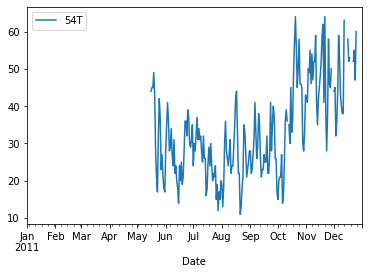

In [ ]:
pm25_2011.plot(x="Date", y="54T")
plt.show()

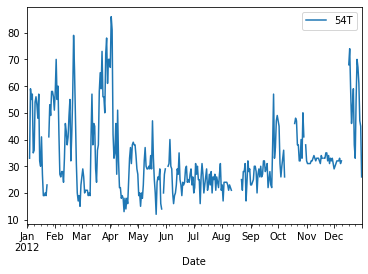

In [ ]:
pm25_2012.plot(x="Date", y="54T")
plt.show()

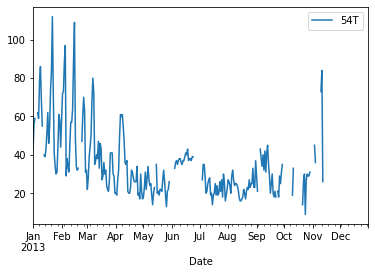

In [ ]:
pm25_2013.plot(x="Date", y="54T")
plt.show()

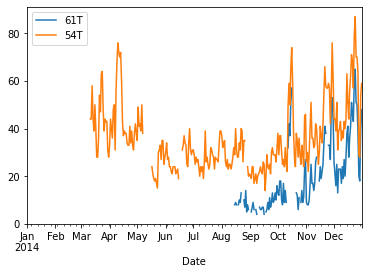

In [ ]:
pm25_2014.plot(x="Date", y=["61T", "54T"])
plt.show()

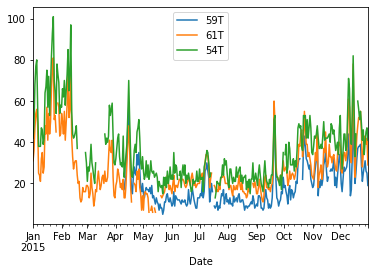

In [ ]:
pm25_2015.plot(x="Date", y=["59T", "61T", "54T"])
plt.show()

<Figure size 3600x3600 with 0 Axes>

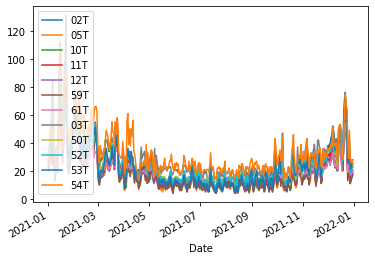

In [ ]:
plt.figure(figsize=(50,50))
pm25_2021.plot(x="Date", y=["02T","05T","10T","11T","12T","59T","61T","03T","50T","52T","53T","54T"])
plt.show()

# PM10

In [ ]:
pm10_2011 = pd.read_excel("/content/PM10(2011).xlsx")
pm10_2011.describe()

,02T,03T,05T,07T,10T,11T,12T,15T,59T,61T,48T,49T,50T,52T,53T,54T
count,128.000000,177.000000,99.000000,135.000000,354.000000,316.000000,99.000000,244.000000,265.000000,88.000000,280.000000,248.000000,355.000000,279.000000,307.000000,298.000000
mean,72.398438,26.994350,53.959596,51.762963,28.014124,40.468354,32.575758,26.844262,37.252830,43.738636,69.050000,65.092742,57.366197,25.749104,24.061889,54.328859
std,20.033177,14.444839,12.131019,18.961157,10.510608,15.961529,8.976262,11.969110,18.326176,12.977872,22.144305,24.995778,20.585936,8.477316,9.665285,20.312522
min,34.000000,7.000000,24.000000,22.000000,13.000000,17.000000,17.000000,9.000000,12.000000,17.000000,14.000000,24.000000,19.000000,12.000000,10.000000,18.000000
25%,57.000000,16.000000,45.500000,38.000000,20.000000,28.000000,27.000000,18.000000,23.000000,34.750000,58.000000,47.000000,42.000000,20.000000,17.000000,39.000000
50%,69.000000,22.000000,52.000000,47.000000,25.000000,38.000000,31.000000,23.000000,32.000000,43.500000,69.000000,60.000000,53.000000,24.000000,22.000000,50.000000
75%,87.000000,37.000000,63.500000,64.000000,34.000000,51.000000,37.000000,32.000000,47.000000,51.250000,81.000000,78.000000,69.500000,29.000000,30.000000,66.000000
max,132.000000,81.000000,81.000000,106.000000,62.000000,100.000000,68.000000,76.000000,94.000000,81.000000,145.000000,155.000000,127.000000,59.000000,79.000000,126.000000


In [ ]:
pm10_2011.dtypes

Date    datetime64[ns]
02T            float64
03T            float64
05T            float64
07T            float64
10T            float64
11T            float64
12T            float64
15T            float64
59T            float64
61T            float64
48T            float64
49T            float64
50T            float64
52T            float64
53T            float64
54T            float64
dtype: object

In [ ]:
pm10_2012 = pd.read_excel("/content/PM10(2012).xlsx")
pm10_2012.describe()

,02T,03T,05T,07T,10T,11T,12T,15T,59T,61T,48T,49T,50T,52T,53T,54T,51T
count,82.000000,172.000000,218.000000,133.000000,364.000000,343.000000,0.0,194.000000,343.000000,227.000000,236.000000,177.000000,321.000000,269.000000,256.000000,344.000000,200.000000
mean,62.475610,40.808140,38.642202,47.593985,25.788462,43.924198,NaN,25.731959,37.259475,21.440529,77.444915,71.966102,56.816199,24.535316,23.628906,56.552326,77.915000
std,21.480526,19.421256,18.107728,21.577218,9.573942,19.624995,NaN,10.340840,17.947772,9.700367,19.311146,26.698421,19.292822,9.732411,7.689500,21.497241,36.602273
min,26.000000,14.000000,13.000000,17.000000,11.000000,17.000000,NaN,10.000000,14.000000,8.000000,37.000000,24.000000,22.000000,10.000000,10.000000,20.000000,12.000000
25%,46.000000,26.000000,26.000000,29.000000,18.000000,29.000000,NaN,17.000000,23.000000,14.000000,66.000000,54.000000,43.000000,16.000000,17.000000,39.000000,64.750000
50%,58.000000,34.000000,34.000000,44.000000,23.000000,39.000000,NaN,23.000000,33.000000,19.000000,76.000000,66.000000,52.000000,23.000000,23.000000,53.000000,79.000000
75%,74.000000,52.000000,46.750000,61.000000,32.000000,55.000000,NaN,33.000000,47.000000,27.000000,86.000000,85.000000,66.000000,31.000000,28.000000,69.250000,95.250000
max,130.000000,108.000000,135.000000,101.000000,63.000000,121.000000,NaN,57.000000,93.000000,58.000000,149.000000,161.000000,127.000000,59.000000,42.000000,114.000000,211.000000


In [ ]:
pm10_2013 = pd.read_excel("/content/PM10(2013).xlsx")
pm10_2013.describe()

,02T,03T,05T,07T,10T,11T,12T,15T,59T,61T,48T,49T,50T,52T,53T,54T
count,310.000000,347.000000,289.000000,339.000000,181.000000,344.000000,333.000000,361.000000,359.000000,315.000000,210.000000,252.000000,339.000000,257.000000,358.000000,359.000000
mean,52.619355,42.354467,43.993080,50.755162,42.110497,41.982558,49.807808,20.171745,41.284123,24.780952,73.700000,82.186508,67.277286,22.108949,22.860335,57.637883
std,28.824718,22.221520,29.971398,25.884511,25.773995,21.749562,31.376729,9.408234,23.912843,17.006170,29.001906,50.292540,28.886430,11.266125,8.958825,26.461574
min,6.000000,10.000000,13.000000,12.000000,13.000000,13.000000,9.000000,8.000000,12.000000,5.000000,25.000000,13.000000,25.000000,7.000000,9.000000,21.000000
25%,34.000000,26.000000,25.000000,33.000000,24.000000,26.000000,27.000000,13.000000,24.000000,14.000000,55.000000,52.000000,46.000000,14.000000,16.000000,38.000000
50%,43.000000,36.000000,34.000000,42.000000,35.000000,34.000000,39.000000,17.000000,32.000000,19.000000,68.000000,70.000000,58.000000,20.000000,20.000000,51.000000
75%,68.750000,54.000000,55.000000,61.000000,54.000000,53.000000,65.000000,25.000000,53.000000,30.500000,85.000000,98.000000,81.000000,29.000000,27.000000,71.000000
max,158.000000,129.000000,173.000000,154.000000,121.000000,141.000000,189.000000,57.000000,146.000000,103.000000,178.000000,303.000000,166.000000,109.000000,54.000000,156.000000


In [ ]:
pm10_2014 = pd.read_excel("/content/PM10(2014).xlsx")
pm10_2014.describe()

,02T,03T,05T,07T,10T,11T,12T,15T,59T,61T,48T,49T,50T,52T,53T,54T
count,340.000000,355.000000,279.000000,294.000000,336.000000,338.000000,352.000000,293.000000,274.000000,183.000000,308.000000,254.000000,316.000000,264.000000,345.000000,344.000000
mean,51.517647,39.098592,40.659498,39.792517,46.994048,40.470414,48.338068,16.959044,36.594891,51.863388,57.331169,63.291339,74.515823,23.984848,21.417391,54.610465
std,27.452017,23.019861,19.800503,22.783320,26.736525,19.791660,28.688660,5.694719,20.486575,29.098883,19.812823,19.642299,25.024110,14.031190,8.871809,21.255066
min,23.000000,11.000000,13.000000,17.000000,17.000000,16.000000,11.000000,7.000000,13.000000,14.000000,24.000000,23.000000,30.000000,10.000000,8.000000,13.000000
25%,33.000000,24.000000,27.000000,26.000000,28.750000,26.000000,29.000000,12.000000,22.000000,29.000000,44.000000,50.250000,57.000000,15.000000,15.000000,40.000000
50%,44.500000,33.000000,35.000000,31.000000,39.000000,36.000000,42.000000,17.000000,31.000000,45.000000,53.000000,61.000000,71.000000,18.000000,20.000000,50.000000
75%,58.250000,47.000000,49.500000,43.750000,54.250000,47.000000,57.000000,21.000000,42.000000,69.500000,67.000000,72.000000,88.250000,28.000000,25.000000,64.000000
max,182.000000,154.000000,151.000000,146.000000,169.000000,142.000000,191.000000,40.000000,125.000000,149.000000,152.000000,141.000000,202.000000,91.000000,68.000000,149.000000


In [ ]:
pm10_2015 = pd.read_excel("/content/PM10(2015).xlsx")
pm10_2015.describe()

,02T,03T,05T,07T,10T,11T,12T,15T,59T,61T,48T,49T,50T,52T,53T,54T
count,322.000000,348.000000,201.000000,0.0,356.000000,291.000000,312.00000,333.00000,264.000000,362.000000,67.000000,250.000000,146.000000,358.000000,212.000000,361.000000
mean,42.086957,42.879310,35.373134,NaN,39.783708,33.694158,44.75000,20.78979,32.719697,40.817680,61.955224,54.900000,60.335616,18.684358,18.655660,47.556787
std,18.218094,26.319634,14.509138,NaN,21.699506,13.939250,22.34849,4.37314,17.464930,21.019841,23.538127,11.734427,20.759137,7.331168,7.077052,21.987186
min,15.000000,8.000000,8.000000,NaN,12.000000,9.000000,10.00000,16.00000,12.000000,14.000000,19.000000,38.000000,25.000000,7.000000,7.000000,10.000000
25%,29.000000,23.750000,26.000000,NaN,24.000000,24.000000,28.00000,18.00000,19.000000,25.000000,41.500000,48.000000,45.000000,13.000000,14.000000,31.000000
50%,39.000000,34.000000,32.000000,NaN,35.000000,31.000000,41.00000,19.00000,26.000000,35.000000,62.000000,52.000000,56.000000,16.000000,17.000000,40.000000
75%,51.750000,60.000000,43.000000,NaN,49.000000,40.000000,56.25000,23.00000,44.000000,50.000000,76.500000,58.000000,72.750000,23.000000,21.250000,62.000000
max,108.000000,188.000000,108.000000,NaN,125.000000,105.000000,135.00000,39.00000,104.000000,129.000000,118.000000,99.000000,139.000000,49.000000,47.000000,135.000000


In [ ]:
pm10_2016 = pd.read_excel("/content/PM10(2016).xlsx")
pm10_2016.describe()

,02T,03T,05T,10T,11T,12T,59T,61T,50T,52T,53T,54T
count,198.000000,314.000000,222.000000,307.000000,303.000000,277.000000,359.000000,330.000000,76.000000,214.000000,72.000000,308.000000
mean,39.944444,41.582803,37.765766,37.524430,32.848185,41.837545,35.534819,37.851515,78.605263,40.971963,21.347222,62.461039
std,17.854799,21.711170,16.025689,19.774758,15.524710,19.782485,16.807430,18.725478,17.832614,19.211185,4.516510,24.997233
min,16.000000,10.000000,15.000000,11.000000,9.000000,12.000000,14.000000,12.000000,50.000000,10.000000,12.000000,26.000000
25%,26.000000,28.000000,26.000000,23.000000,23.000000,26.000000,22.500000,24.000000,63.000000,28.000000,19.000000,43.750000
50%,36.500000,36.000000,34.000000,32.000000,28.000000,38.000000,32.000000,33.000000,78.500000,37.000000,20.500000,56.500000
75%,49.750000,50.000000,44.000000,46.000000,41.000000,52.000000,43.000000,45.000000,90.000000,48.750000,24.000000,76.000000
max,98.000000,152.000000,85.000000,118.000000,107.000000,116.000000,108.000000,120.000000,131.000000,106.000000,34.000000,156.000000


In [ ]:
pm10_2017 = pd.read_excel("/content/PM10(2017).xlsx")
pm10_2017.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,242.000000,338.000000,331.000000,196.000000,169.000000,325.000000,337.000000,282.000000,218.000000,360.000000,206.000000,272.000000
mean,36.095041,38.363905,34.854985,23.005102,44.355030,36.443077,36.148368,61.003546,53.018349,44.233333,44.024272,62.808824
std,17.056997,17.942063,16.845019,12.644041,19.304376,16.487387,18.386928,18.246532,17.429770,19.653715,20.248081,23.269325
min,12.000000,7.000000,11.000000,7.000000,14.000000,12.000000,11.000000,12.000000,24.000000,11.000000,17.000000,13.000000
25%,22.000000,25.000000,22.000000,14.000000,30.000000,23.000000,21.000000,49.000000,40.000000,30.000000,28.000000,44.750000
50%,32.000000,33.000000,31.000000,20.000000,42.000000,32.000000,31.000000,59.000000,48.000000,38.000000,37.000000,61.000000
75%,46.000000,48.000000,45.000000,28.250000,55.000000,46.000000,47.000000,73.000000,63.000000,57.000000,56.500000,78.000000
max,88.000000,95.000000,100.000000,76.000000,103.000000,87.000000,102.000000,123.000000,113.000000,114.000000,105.000000,136.000000


In [ ]:
pm10_2018 = pd.read_excel("/content/PM10(2018).xlsx")
pm10_2018.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,315.000000,353.000000,291.000000,34.000000,62.000000,360.000000,322.000000,360.000000,359.000000,359.000000,365.000000,158.000000
mean,42.339683,41.651558,40.986254,43.735294,76.887097,36.402778,42.161491,68.741667,54.807799,52.994429,52.208219,64.360759
std,16.890492,21.533414,20.339866,13.687660,28.282593,18.751906,19.967700,22.674577,21.102155,25.766896,25.276937,22.564336
min,20.000000,13.000000,10.000000,24.000000,21.000000,13.000000,18.000000,26.000000,22.000000,19.000000,20.000000,24.000000
25%,30.000000,26.000000,27.000000,34.000000,56.250000,23.000000,28.000000,53.000000,39.000000,33.000000,33.000000,46.500000
50%,38.000000,35.000000,34.000000,44.000000,77.000000,31.500000,36.000000,65.000000,50.000000,45.000000,44.000000,63.000000
75%,51.000000,51.000000,50.000000,50.000000,98.500000,44.000000,48.750000,79.000000,66.000000,67.500000,66.000000,78.750000
max,117.000000,153.000000,116.000000,74.000000,136.000000,128.000000,119.000000,159.000000,140.000000,168.000000,178.000000,141.000000


In [ ]:
pm10_2019 = pd.read_excel("/content/PM10(2019).xlsx")
pm10_2019.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,349.000000,365.000000,358.000000,170.000000,283.000000,365.000000,362.000000,361.000000,365.000000,362.000000,364.000000,358.000000
mean,43.810888,40.265753,35.687151,44.694118,57.798587,34.375342,44.704420,67.421053,52.586301,44.776243,47.445055,68.578212
std,19.530371,20.026440,18.507699,18.510527,17.797075,16.253958,18.783308,23.442838,19.438020,21.350840,21.841774,19.794130
min,14.000000,11.000000,11.000000,14.000000,31.000000,12.000000,19.000000,29.000000,21.000000,15.000000,17.000000,32.000000
25%,28.000000,27.000000,22.000000,29.000000,45.000000,22.000000,30.000000,52.000000,39.000000,30.000000,30.750000,54.000000
50%,40.000000,35.000000,30.000000,41.500000,53.000000,29.000000,40.000000,63.000000,49.000000,39.000000,43.500000,67.000000
75%,55.000000,48.000000,44.000000,61.000000,65.000000,42.000000,54.750000,78.000000,61.000000,54.750000,58.000000,79.000000
max,109.000000,129.000000,124.000000,113.000000,127.000000,102.000000,126.000000,179.000000,142.000000,123.000000,140.000000,153.000000


In [ ]:
pm10_2020 = pd.read_excel("/content/PM10(2020).xlsx")
pm10_2020.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,362.000000,365.000000,352.000000,366.000000,358.000000,366.000000,365.000000,361.000000,364.000000,366.000000,361.000000,364.000000
mean,44.157459,34.353425,34.931818,34.161202,44.513966,31.540984,39.145205,59.603878,47.406593,40.019126,44.919668,61.730769
std,24.643273,20.038384,19.571650,20.655391,21.282509,16.139706,19.652706,24.995353,20.032606,20.339776,23.369417,25.068590
min,15.000000,10.000000,12.000000,12.000000,16.000000,10.000000,15.000000,28.000000,20.000000,12.000000,13.000000,26.000000
25%,26.000000,20.000000,21.000000,20.000000,29.000000,20.250000,24.000000,43.000000,33.000000,26.000000,27.000000,43.000000
50%,35.000000,27.000000,28.000000,27.000000,38.000000,26.000000,33.000000,50.000000,42.000000,33.000000,36.000000,54.000000
75%,55.750000,43.000000,42.250000,41.750000,55.000000,40.000000,48.000000,69.000000,56.000000,49.000000,61.000000,75.000000
max,145.000000,130.000000,104.000000,139.000000,124.000000,101.000000,114.000000,179.000000,123.000000,140.000000,121.000000,171.000000


In [ ]:
pm10_2021 = pd.read_excel("/content/PM10(2021).xlsx")
pm10_2021.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,361.000000,365.000000,353.000000,364.000000,362.000000,365.000000,359.000000,354.000000,363.000000,365.000000,358.000000,363.000000
mean,42.157895,35.189041,39.422096,36.958791,43.162983,32.035616,40.927577,64.980226,45.851240,43.276712,45.927374,62.917355
std,22.648277,20.410752,20.606714,19.839326,22.526647,15.377533,19.366656,29.256842,20.627448,21.228548,24.204550,21.976854
min,15.000000,10.000000,12.000000,12.000000,16.000000,14.000000,18.000000,30.000000,17.000000,17.000000,12.000000,28.000000
25%,26.000000,21.000000,23.000000,21.750000,27.000000,21.000000,26.000000,42.000000,31.000000,28.000000,26.000000,46.500000
50%,35.000000,29.000000,33.000000,31.000000,36.000000,27.000000,36.000000,57.000000,40.000000,36.000000,39.000000,57.000000
75%,50.000000,44.000000,52.000000,48.000000,53.000000,38.000000,51.000000,78.000000,57.500000,52.000000,61.500000,75.000000
max,148.000000,131.000000,122.000000,129.000000,148.000000,101.000000,118.000000,216.000000,144.000000,153.000000,136.000000,150.000000


In [ ]:
pm10_2022 = pd.read_excel("/content/PM10(2022).xlsx")
pm10_2022.describe()

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T
count,165.000000,181.000000,170.000000,27.000000,171.000000,181.000000,106.000000,104.000000,181.000000,173.000000,179.000000,181.000000
mean,41.515152,37.640884,39.300000,36.407407,42.345029,32.944751,51.783019,74.778846,47.850829,37.907514,42.519553,64.640884
std,16.013944,16.281492,16.677892,7.855715,16.101634,12.697210,14.962178,19.665631,15.403277,16.800215,16.374254,18.027704
min,18.000000,17.000000,15.000000,21.000000,20.000000,16.000000,25.000000,33.000000,23.000000,16.000000,15.000000,35.000000
25%,29.000000,25.000000,27.000000,31.500000,30.000000,23.000000,41.000000,61.750000,38.000000,25.000000,30.500000,52.000000
50%,38.000000,33.000000,36.000000,37.000000,38.000000,31.000000,50.000000,71.500000,44.000000,33.000000,40.000000,61.000000
75%,50.000000,46.000000,48.750000,42.000000,50.000000,39.000000,61.750000,83.750000,56.000000,45.000000,51.000000,73.000000
max,115.000000,97.000000,98.000000,52.000000,94.000000,100.000000,90.000000,135.000000,108.000000,98.000000,96.000000,133.000000


In [ ]:
pm10_2022.dtypes

Date    datetime64[ns]
02T            float64
05T            float64
10T            float64
11T            float64
12T            float64
59T            float64
61T            float64
03T            float64
50T            float64
52T            float64
53T            float64
54T            float64
dtype: object

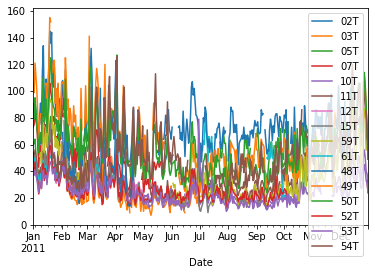

In [ ]:
pm10_2011.plot(x="Date", y=["02T","03T","05T","07T","10T","11T","12T","15T","59T","61T","48T","49T","50T","52T","53T","54T"])
plt.show()

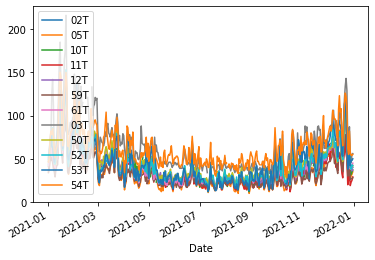

In [ ]:
pm10_2021.plot(x="Date", y=["02T","05T","10T","11T","12T","59T","61T","03T","50T","52T","53T","54T"])
plt.show()

# Temp

Can these data be upsampled? https://towardsdatascience.com/upsample-with-an-average-in-pandas-c029032c57ca

In [ ]:
maxtemp = pd.read_csv("/content/MaxTemp_Thailand.csv")
meantemp = pd.read_csv("/content/MeanTemp_Thailand.csv")
mintemp = pd.read_csv("/content/MinTemp_Thailand.csv")

In [ ]:
maxtemp.head()

,Year,Statistics,MonthYear,MaxTempC
0,2011,Jan Average,Jan-11,29.3
1,2011,Feb Average,Feb-11,32.3
2,2011,Mar Average,Mar-11,31.8
3,2011,Apr Average,Apr-11,33.3
4,2011,May Average,May-11,32.6


In [ ]:
maxtemp.dtypes

 Year            int64
 Statistics     object
MonthYear       object
MaxTempC       float64
dtype: object

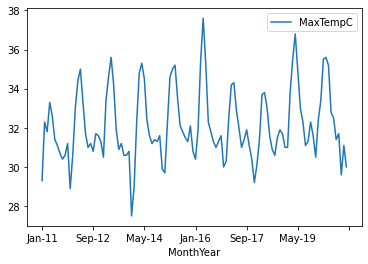

In [ ]:
maxtemp.plot(x="MonthYear", y="MaxTempC")
plt.show()

# Rainfall

In [ ]:
rainfall = pd.read_csv("/content/Rainfall_Thailand.csv")

In [ ]:
rainfall.head()

,Year,Statistics,MonthYear,FallMM
0,2011,Jan Average,Jan-11,25.1
1,2011,Feb Average,Feb-11,15.1
2,2011,Mar Average,Mar-11,78.6
3,2011,Apr Average,Apr-11,129.6
4,2011,May Average,May-11,225.5


In [ ]:
rainfall.dtypes

 Year            int64
 Statistics     object
MonthYear       object
FallMM         float64
dtype: object

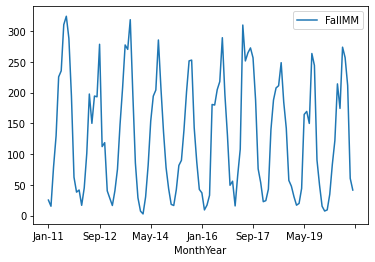

In [ ]:
rainfall.plot(x="MonthYear", y="FallMM")
plt.show()

# Overview

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
# Newer year data tend to have less N/A
missing_percentage(pm25_2021)

,Total,Percent
10T,11,3.01
53T,7,1.92
61T,6,1.64
03T,4,1.10
50T,4,1.10
02T,3,0.82
12T,2,0.55
54T,2,0.55
Date,0,0.00
05T,0,0.00


In [ ]:
# Older year data have a lot of N/A
missing_percentage(pm25_2014)

,Total,Percent
61T,245,67.12
54T,83,22.74
Date,0,0.00


In [ ]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [ ]:
percent_value_counts(pm25_2014, '61T')

,Total,Percent
NaN,245,67.12
9.0,11,3.01
6.0,8,2.19
8.0,7,1.92
10.0,6,1.64
13.0,6,1.64
7.0,6,1.64
17.0,6,1.64
14.0,4,1.10
23.0,4,1.10


# Try to clean data
- Method 1: Drop column that is NaN for the whole column. Then average the column row-wised. E.g., --> df['avg'] = df.mean(axis=1), df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1).

- If its NaN because the station starts collecting data in the middle of the year. --> Try to find data from other sources? Average the whole year and replace the NaN with that?

- To drop: PM 2.5 (2017) Station 54T (NaN whole column)

- Method 2: Using interpolation --> Linear interpolate

- https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide#1.-Data-visualization-%F0%9F%93%8A


In [ ]:
pm25_2011

,Date,54T
0,2011-01-01,NaN
1,2011-01-02,NaN
2,2011-01-03,NaN
3,2011-01-04,NaN
4,2011-01-05,NaN
...,...,...
360,2011-12-27,NaN
361,2011-12-28,NaN
362,2011-12-29,NaN
363,2011-12-30,NaN


In [ ]:
pm25_2020.keys()

Index(['Date', '02T', '05T', '10T', '11T', '12T', '59T', '61T', '03T', '50T',
       '52T', '53T', '54T'],
      dtype='object')

In [ ]:
# pm25_2017.drop('54T', inplace=True, axis=1) 
# pm25_2011.drop(pm25_2011.index[0:135], inplace=True) 
# pm25_2011 = pm25_2011.reset_index(drop=True)
# pm25_2022.drop(pm25_2022.index[181:365], inplace=True)

pm25_2011['54T'].fillna(value=pm25_2011['54T'].mean(), inplace=True)

pm25_2012['54T'].fillna(value=pm25_2012['54T'].mean(), inplace=True)

pm25_2013['54T'].fillna(value=pm25_2013['54T'].mean(), inplace=True)

pm25_2013['54T'].fillna(value=pm25_2013['54T'].mean(), inplace=True)

pm25_2014['61T'].fillna(value=pm25_2014['61T'].mean(), inplace=True)
pm25_2014['54T'].fillna(value=pm25_2014['54T'].mean(), inplace=True)

pm25_2015['59T'].fillna(value=pm25_2015['59T'].mean(), inplace=True)
pm25_2015['61T'].fillna(value=pm25_2015['61T'].mean(), inplace=True)
pm25_2015['54T'].fillna(value=pm25_2015['54T'].mean(), inplace=True)

pm25_2016['05T'].fillna(value=pm25_2016['05T'].mean(), inplace=True)
pm25_2016['52T'].fillna(value=pm25_2016['52T'].mean(), inplace=True)
pm25_2016['59T'].fillna(value=pm25_2016['59T'].mean(), inplace=True)
pm25_2016['61T'].fillna(value=pm25_2016['61T'].mean(), inplace=True)
pm25_2016['54T'].fillna(value=pm25_2016['54T'].mean(), inplace=True)

# 2017, dropped 54T
pm25_2017['05T'].fillna(value=pm25_2017['05T'].mean(), inplace=True)
pm25_2017['50T'].fillna(value=pm25_2017['50T'].mean(), inplace=True)
pm25_2017['52T'].fillna(value=pm25_2017['52T'].mean(), inplace=True)
pm25_2017['59T'].fillna(value=pm25_2017['59T'].mean(), inplace=True)
pm25_2017['61T'].fillna(value=pm25_2017['61T'].mean(), inplace=True)
pm25_2017['53T'].fillna(value=pm25_2017['53T'].mean(), inplace=True)

pm25_2018['05T'].fillna(value=pm25_2018['05T'].mean(), inplace=True)
pm25_2018['10T'].fillna(value=pm25_2018['10T'].mean(), inplace=True)
pm25_2018['11T'].fillna(value=pm25_2018['11T'].mean(), inplace=True)
pm25_2018['50T'].fillna(value=pm25_2018['50T'].mean(), inplace=True)
pm25_2018['52T'].fillna(value=pm25_2018['52T'].mean(), inplace=True)
pm25_2018['59T'].fillna(value=pm25_2018['59T'].mean(), inplace=True)
pm25_2018['61T'].fillna(value=pm25_2018['61T'].mean(), inplace=True)
pm25_2018['03T'].fillna(value=pm25_2018['03T'].mean(), inplace=True)
pm25_2018['53T'].fillna(value=pm25_2018['53T'].mean(), inplace=True)
pm25_2018['54T'].fillna(value=pm25_2018['54T'].mean(), inplace=True)

pm25_2019['02T'].fillna(value=pm25_2019['02T'].mean(), inplace=True)
pm25_2019['05T'].fillna(value=pm25_2019['05T'].mean(), inplace=True)
pm25_2019['10T'].fillna(value=pm25_2019['10T'].mean(), inplace=True)
pm25_2019['11T'].fillna(value=pm25_2019['11T'].mean(), inplace=True)
pm25_2019['12T'].fillna(value=pm25_2019['12T'].mean(), inplace=True)
pm25_2019['50T'].fillna(value=pm25_2019['50T'].mean(), inplace=True)
pm25_2019['52T'].fillna(value=pm25_2019['52T'].mean(), inplace=True)
pm25_2019['59T'].fillna(value=pm25_2019['59T'].mean(), inplace=True)
pm25_2019['61T'].fillna(value=pm25_2019['61T'].mean(), inplace=True)
pm25_2019['03T'].fillna(value=pm25_2019['03T'].mean(), inplace=True)
pm25_2019['53T'].fillna(value=pm25_2019['53T'].mean(), inplace=True)
pm25_2019['54T'].fillna(value=pm25_2019['54T'].mean(), inplace=True)

pm25_2020['02T'].fillna(value=pm25_2020['02T'].mean(), inplace=True)
pm25_2020['05T'].fillna(value=pm25_2020['05T'].mean(), inplace=True)
pm25_2020['10T'].fillna(value=pm25_2020['10T'].mean(), inplace=True)
pm25_2020['11T'].fillna(value=pm25_2020['11T'].mean(), inplace=True)
pm25_2020['12T'].fillna(value=pm25_2020['12T'].mean(), inplace=True)
pm25_2020['50T'].fillna(value=pm25_2020['50T'].mean(), inplace=True)
pm25_2020['52T'].fillna(value=pm25_2020['52T'].mean(), inplace=True)
pm25_2020['59T'].fillna(value=pm25_2020['59T'].mean(), inplace=True)
pm25_2020['61T'].fillna(value=pm25_2020['61T'].mean(), inplace=True)
pm25_2020['03T'].fillna(value=pm25_2020['03T'].mean(), inplace=True)
pm25_2020['53T'].fillna(value=pm25_2020['53T'].mean(), inplace=True)
pm25_2020['54T'].fillna(value=pm25_2020['54T'].mean(), inplace=True)

pm25_2021['02T'].fillna(value=pm25_2021['02T'].mean(), inplace=True)
pm25_2021['05T'].fillna(value=pm25_2021['05T'].mean(), inplace=True)
pm25_2021['10T'].fillna(value=pm25_2021['10T'].mean(), inplace=True)
pm25_2021['11T'].fillna(value=pm25_2021['11T'].mean(), inplace=True)
pm25_2021['12T'].fillna(value=pm25_2021['12T'].mean(), inplace=True)
pm25_2021['50T'].fillna(value=pm25_2021['50T'].mean(), inplace=True)
pm25_2021['52T'].fillna(value=pm25_2021['52T'].mean(), inplace=True)
pm25_2021['59T'].fillna(value=pm25_2021['59T'].mean(), inplace=True)
pm25_2021['61T'].fillna(value=pm25_2021['61T'].mean(), inplace=True)
pm25_2021['03T'].fillna(value=pm25_2021['03T'].mean(), inplace=True)
pm25_2021['53T'].fillna(value=pm25_2021['53T'].mean(), inplace=True)
pm25_2021['54T'].fillna(value=pm25_2021['54T'].mean(), inplace=True)

pm25_2022['02T'].fillna(value=pm25_2022['02T'].mean(), inplace=True)
pm25_2022['05T'].fillna(value=pm25_2022['05T'].mean(), inplace=True)
pm25_2022['10T'].fillna(value=pm25_2022['10T'].mean(), inplace=True)
pm25_2022['11T'].fillna(value=pm25_2022['11T'].mean(), inplace=True)
pm25_2022['12T'].fillna(value=pm25_2022['12T'].mean(), inplace=True)
pm25_2022['50T'].fillna(value=pm25_2022['50T'].mean(), inplace=True)
pm25_2022['52T'].fillna(value=pm25_2022['52T'].mean(), inplace=True)
pm25_2022['59T'].fillna(value=pm25_2022['59T'].mean(), inplace=True)
pm25_2022['61T'].fillna(value=pm25_2022['61T'].mean(), inplace=True)
pm25_2022['03T'].fillna(value=pm25_2022['03T'].mean(), inplace=True)
pm25_2022['53T'].fillna(value=pm25_2022['53T'].mean(), inplace=True)
pm25_2022['54T'].fillna(value=pm25_2022['54T'].mean(), inplace=True)

# print(pm25_2011.to_markdown())

In [ ]:
pm25_2011['avg'] = pm25_2011.mean(axis=1)
pm25_2012['avg'] = pm25_2012.mean(axis=1)
pm25_2013['avg'] = pm25_2013.mean(axis=1)
pm25_2014['avg'] = pm25_2014.mean(axis=1)
pm25_2015['avg'] = pm25_2015.mean(axis=1)
pm25_2016['avg'] = pm25_2016.mean(axis=1)
pm25_2017['avg'] = pm25_2017.mean(axis=1)
pm25_2018['avg'] = pm25_2018.mean(axis=1)
pm25_2019['avg'] = pm25_2019.mean(axis=1)
pm25_2020['avg'] = pm25_2020.mean(axis=1)
pm25_2021['avg'] = pm25_2021.mean(axis=1)
pm25_2022['avg'] = pm25_2022.mean(axis=1)

In [ ]:
all_avg_df = [pm25_2011['avg'], pm25_2012['avg'], pm25_2013['avg'], pm25_2014['avg'],
              pm25_2015['avg'], pm25_2016['avg'], pm25_2017['avg'], pm25_2018['avg'],
              pm25_2019['avg'], pm25_2020['avg'], pm25_2021['avg'], pm25_2022['avg']]
all_date = [pm25_2011['Date'], pm25_2012['Date'], pm25_2013['Date'], pm25_2014['Date'],
              pm25_2015['Date'], pm25_2016['Date'], pm25_2017['Date'], pm25_2018['Date'],
              pm25_2019['Date'], pm25_2020['Date'], pm25_2021['Date'], pm25_2022['Date']]
pm25_avg_val = pd.concat(all_avg_df, ignore_index=True)
pm25_avg_date = pd.concat(all_date, ignore_index=True)
date_val = [pm25_avg_date, pm25_avg_val]
pm25_avg = pd.concat(date_val, axis=1)
pm25_avg

,Date,avg
0,2011-01-01,33.213953
1,2011-01-02,33.213953
2,2011-01-03,33.213953
3,2011-01-04,33.213953
4,2011-01-05,33.213953
...,...,...
4378,2022-12-27,24.490674
4379,2022-12-28,24.490674
4380,2022-12-29,24.490674
4381,2022-12-30,24.490674


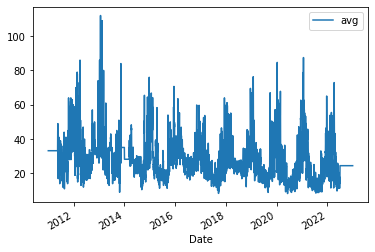

In [ ]:
pm25_avg.plot(x='Date', y='avg')

In [ ]:
# # Extract only date and month
# pm25_2011['day'] = pd.DatetimeIndex(pm25_2011['Date']).day
# pm25_2011['month'] = pd.DatetimeIndex(pm25_2011['Date']).month
# pm25_2011['daymonth'] = pd.to_datetime(pm25_2011[['day', 'month']].assign(DAY=1))

In [ ]:
# pm25_2011.drop('day', inplace=True, axis=1)
# pm25_2011.drop('month', inplace=True, axis=1)

# Plotting graph between multiple years

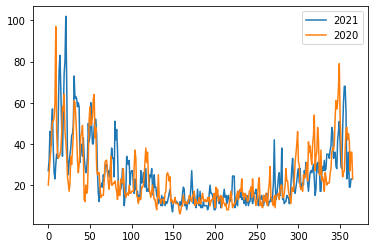

In [ ]:
ax = pm25_2021.plot(y="02T", use_index=True, label='2021')
pm25_2020.plot(ax=ax, y="02T", label='2020')

plt.legend()
plt.show()

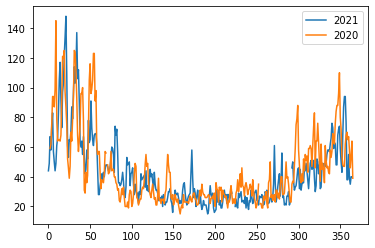

In [ ]:
ax = pm10_2021.plot(y="02T", use_index=True, label='2021')
pm10_2020.plot(ax=ax, y="02T", label='2020')

plt.legend()
plt.show()

<Figure size 2880x2880 with 0 Axes>

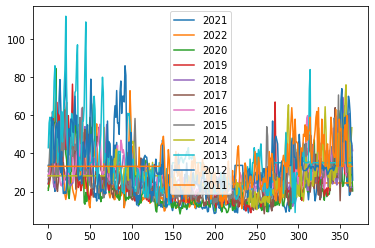

In [ ]:
plt.figure(figsize=(40,40))
ax1 = pm25_2021.plot(y="avg", use_index=True, label='2021')
pm25_2022.plot(ax=ax1, y="avg", label='2022')
pm25_2020.plot(ax=ax1, y="avg", label='2020')
pm25_2019.plot(ax=ax1, y="avg", label='2019')
pm25_2018.plot(ax=ax1, y="avg", label='2018')
pm25_2017.plot(ax=ax1, y="avg", label='2017')
pm25_2016.plot(ax=ax1, y="avg", label='2016')
pm25_2015.plot(ax=ax1, y="avg", label='2015')
pm25_2014.plot(ax=ax1, y="avg", label='2014')
pm25_2013.plot(ax=ax1, y="avg", label='2013')
pm25_2012.plot(ax=ax1, y="avg", label='2012')
pm25_2011.plot(ax=ax1, y="avg", label='2011')

plt.legend()
plt.show()

## The trend of the PM 2.5 data is, it is higher in the beginning and the end of the year, than in the middle of the year.

- This is because the pollution is typically higher during winter season
- The combination of dry weather, traffic emissions, biomass burning, and meteorological factors such as stable high-pressure ridges create the toxic environment noticeable in the winter months.
- http://doh.hpc.go.th/bs/topicDisplay.php?id=248#:~:text=%E0%B9%81%E0%B8%AB%E0%B8%A5%E0%B9%88%E0%B8%87%E0%B8%81%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B4%E0%B8%94%20PM%202.5%20%E0%B8%A1%E0%B8%B2,%E0%B9%82%E0%B8%A3%E0%B8%87%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%AD%E0%B8%B8%E0%B8%95%E0%B8%AA%E0%B8%B2%E0%B8%AB%E0%B8%81%E0%B8%A3%E0%B8%A3%E0%B8%A1%20%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%81%E0%B9%88%E0%B8%AD%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87
- https://towardsdatascience.com/identifying-the-sources-of-winter-air-pollution-in-bangkok-part-ii-72539f9b767a#:~:text=PM%202.5%20levels-,Weather%20Patterns,in%20the%20air%20for%20longer.

# Try to use other method instead of normal averaging

- ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place. Note: this will modify any other views on this object, (e.g. a no-copy slice for a column in a DataFrame).

In [ ]:
# pm25_2017.drop('54T', inplace=True, axis=1) 
# pm25_2011.drop(pm25_2011.index[0:135], inplace=True) 
# pm25_2011 = pm25_2011.reset_index(drop=True)
# pm25_2022.drop(pm25_2022.index[181:365], inplace=True)

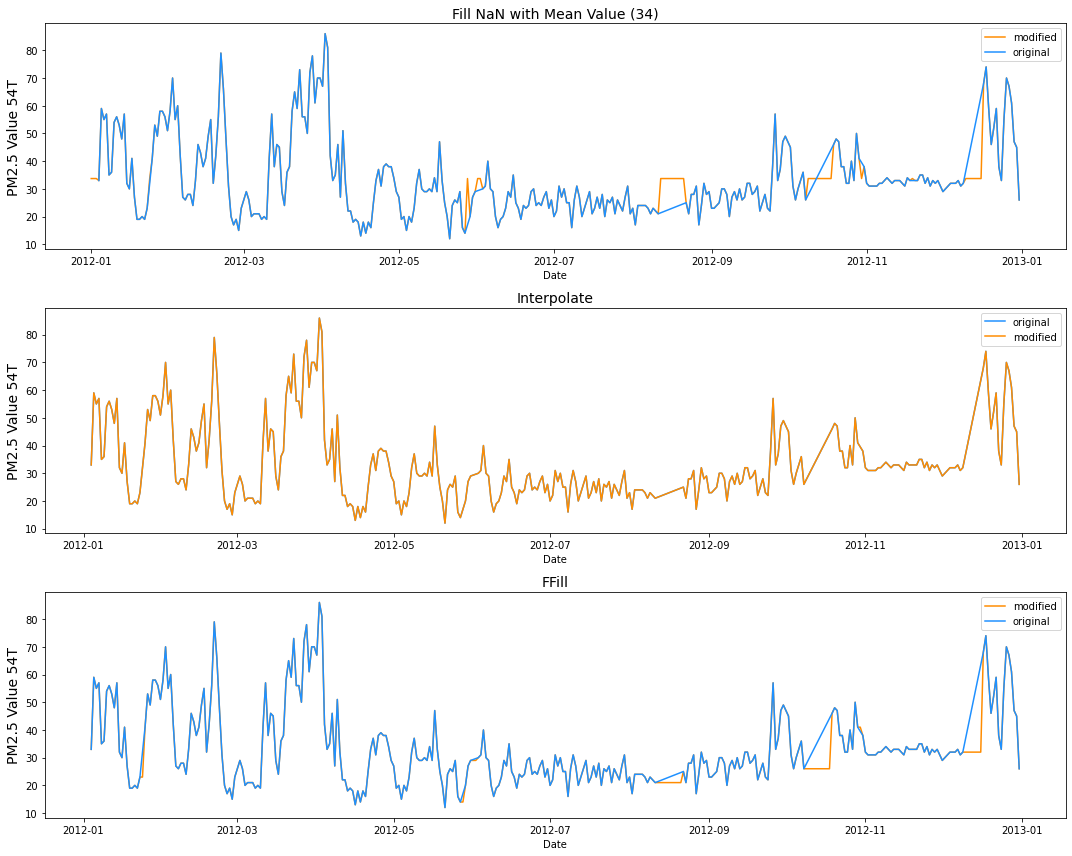

In [ ]:
# mean_drainage = df['drainage_volume'].mean()
# sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
# sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
# ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
# ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
# sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
# ax[3].set_title(f'Interpolate', fontsize=14)
# ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# pm25_2011['54T']

f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

pm25_2012_mean = pm25_2012['54T'].mean()
sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].fillna(pm25_2012_mean), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Fill NaN with Mean Value ({pm25_2012_mean:.0f})', fontsize=14)
ax[0].set_ylabel(ylabel='PM2.5 Value 54T', fontsize=14)

sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].interpolate(), ax=ax[1], color='darkorange', label = 'modified')
ax[1].set_title(f'Interpolate', fontsize=14)
ax[1].set_ylabel(ylabel='PM2.5 Value 54T', fontsize=14)

sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=pm25_2012['Date'], y=pm25_2012['54T'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='PM2.5 Value 54T', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Run this one time per runtime
pm25_2017.drop('54T', inplace=True, axis=1) 
pm25_2011.drop(pm25_2011.index[0:135], inplace=True) 
pm25_2011 = pm25_2011.reset_index(drop=True)
pm25_2022.drop(pm25_2022.index[181:], inplace=True)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
pm25_2011['Date'] = pd.to_datetime(pm25_2011['Date'])
pm25_2011['54T'] = pd.to_numeric(pm25_2011['54T'], errors='coerce')

pm25_2012['Date'] = pd.to_datetime(pm25_2012['Date'])
pm25_2012['54T'] = pd.to_numeric(pm25_2012['54T'], errors='coerce')

pm25_2013['Date'] = pd.to_datetime(pm25_2013['Date'])
pm25_2013['54T'] = pd.to_numeric(pm25_2013['54T'], errors='coerce')

pm25_2014['Date'] = pd.to_datetime(pm25_2014['Date'])
pm25_2014['54T'] = pd.to_numeric(pm25_2014['54T'], errors='coerce')
pm25_2014['61T'] = pd.to_numeric(pm25_2014['61T'], errors='coerce')

pm25_2015['Date'] = pd.to_datetime(pm25_2015['Date'])
pm25_2015['54T'] = pd.to_numeric(pm25_2015['54T'], errors='coerce')
pm25_2015['59T'] = pd.to_numeric(pm25_2015['59T'], errors='coerce')
pm25_2015['61T'] = pd.to_numeric(pm25_2015['61T'], errors='coerce')

pm25_2016['Date'] = pd.to_datetime(pm25_2016['Date'])
pm25_2016['05T'] = pd.to_numeric(pm25_2016['05T'], errors='coerce')
pm25_2016['52T'] = pd.to_numeric(pm25_2016['52T'], errors='coerce')
pm25_2016['59T'] = pd.to_numeric(pm25_2016['59T'], errors='coerce')
pm25_2016['61T'] = pd.to_numeric(pm25_2016['61T'], errors='coerce')
pm25_2016['54T'] = pd.to_numeric(pm25_2016['54T'], errors='coerce')

pm25_2017['Date'] = pd.to_datetime(pm25_2017['Date'])
pm25_2017['05T'] = pd.to_numeric(pm25_2017['05T'], errors='coerce')
pm25_2017['50T'] = pd.to_numeric(pm25_2017['50T'], errors='coerce')
pm25_2017['52T'] = pd.to_numeric(pm25_2017['52T'], errors='coerce')
pm25_2017['59T'] = pd.to_numeric(pm25_2017['59T'], errors='coerce')
pm25_2017['61T'] = pd.to_numeric(pm25_2017['61T'], errors='coerce')
pm25_2017['53T'] = pd.to_numeric(pm25_2017['53T'], errors='coerce')

pm25_2018['Date'] = pd.to_datetime(pm25_2018['Date'])
pm25_2018['05T'] = pd.to_numeric(pm25_2018['05T'], errors='coerce')
pm25_2018['10T'] = pd.to_numeric(pm25_2018['10T'], errors='coerce')
pm25_2018['11T'] = pd.to_numeric(pm25_2018['11T'], errors='coerce')
pm25_2018['50T'] = pd.to_numeric(pm25_2018['50T'], errors='coerce')
pm25_2018['52T'] = pd.to_numeric(pm25_2018['52T'], errors='coerce')
pm25_2018['59T'] = pd.to_numeric(pm25_2018['59T'], errors='coerce')
pm25_2018['61T'] = pd.to_numeric(pm25_2018['61T'], errors='coerce')
pm25_2018['03T'] = pd.to_numeric(pm25_2018['03T'], errors='coerce')
pm25_2018['53T'] = pd.to_numeric(pm25_2018['53T'], errors='coerce')
pm25_2018['54T'] = pd.to_numeric(pm25_2018['54T'], errors='coerce')

pm25_2019['Date'] = pd.to_datetime(pm25_2019['Date'])
pm25_2019['05T'] = pd.to_numeric(pm25_2019['05T'], errors='coerce')
pm25_2019['10T'] = pd.to_numeric(pm25_2019['10T'], errors='coerce')
pm25_2019['11T'] = pd.to_numeric(pm25_2019['11T'], errors='coerce')
pm25_2019['12T'] = pd.to_numeric(pm25_2019['12T'], errors='coerce')
pm25_2019['50T'] = pd.to_numeric(pm25_2019['50T'], errors='coerce')
pm25_2019['52T'] = pd.to_numeric(pm25_2019['52T'], errors='coerce')
pm25_2019['59T'] = pd.to_numeric(pm25_2019['59T'], errors='coerce')
pm25_2019['61T'] = pd.to_numeric(pm25_2019['61T'], errors='coerce')
pm25_2019['03T'] = pd.to_numeric(pm25_2019['03T'], errors='coerce')
pm25_2019['53T'] = pd.to_numeric(pm25_2019['53T'], errors='coerce')
pm25_2019['54T'] = pd.to_numeric(pm25_2019['54T'], errors='coerce')

pm25_2020['Date'] = pd.to_datetime(pm25_2020['Date'])
pm25_2020['05T'] = pd.to_numeric(pm25_2020['05T'], errors='coerce')
pm25_2020['10T'] = pd.to_numeric(pm25_2020['10T'], errors='coerce')
pm25_2020['11T'] = pd.to_numeric(pm25_2020['11T'], errors='coerce')
pm25_2020['12T'] = pd.to_numeric(pm25_2020['12T'], errors='coerce')
pm25_2020['50T'] = pd.to_numeric(pm25_2020['50T'], errors='coerce')
pm25_2020['52T'] = pd.to_numeric(pm25_2020['52T'], errors='coerce')
pm25_2020['59T'] = pd.to_numeric(pm25_2020['59T'], errors='coerce')
pm25_2020['61T'] = pd.to_numeric(pm25_2020['61T'], errors='coerce')
pm25_2020['03T'] = pd.to_numeric(pm25_2020['03T'], errors='coerce')
pm25_2020['53T'] = pd.to_numeric(pm25_2020['53T'], errors='coerce')
pm25_2020['54T'] = pd.to_numeric(pm25_2020['54T'], errors='coerce')

pm25_2021['Date'] = pd.to_datetime(pm25_2021['Date'])
pm25_2021['05T'] = pd.to_numeric(pm25_2021['05T'], errors='coerce')
pm25_2021['10T'] = pd.to_numeric(pm25_2021['10T'], errors='coerce')
pm25_2021['11T'] = pd.to_numeric(pm25_2021['11T'], errors='coerce')
pm25_2021['12T'] = pd.to_numeric(pm25_2021['12T'], errors='coerce')
pm25_2021['50T'] = pd.to_numeric(pm25_2021['50T'], errors='coerce')
pm25_2021['52T'] = pd.to_numeric(pm25_2021['52T'], errors='coerce')
pm25_2021['59T'] = pd.to_numeric(pm25_2021['59T'], errors='coerce')
pm25_2021['61T'] = pd.to_numeric(pm25_2021['61T'], errors='coerce')
pm25_2021['03T'] = pd.to_numeric(pm25_2021['03T'], errors='coerce')
pm25_2021['53T'] = pd.to_numeric(pm25_2021['53T'], errors='coerce')
pm25_2021['54T'] = pd.to_numeric(pm25_2021['54T'], errors='coerce')

pm25_2022['Date'] = pd.to_datetime(pm25_2022['Date'])
pm25_2022['05T'] = pd.to_numeric(pm25_2022['05T'], errors='coerce')
pm25_2022['10T'] = pd.to_numeric(pm25_2022['10T'], errors='coerce')
pm25_2022['11T'] = pd.to_numeric(pm25_2022['11T'], errors='coerce')
pm25_2022['12T'] = pd.to_numeric(pm25_2022['12T'], errors='coerce')
pm25_2022['50T'] = pd.to_numeric(pm25_2022['50T'], errors='coerce')
pm25_2022['52T'] = pd.to_numeric(pm25_2022['52T'], errors='coerce')
pm25_2022['59T'] = pd.to_numeric(pm25_2022['59T'], errors='coerce')
pm25_2022['61T'] = pd.to_numeric(pm25_2022['61T'], errors='coerce')
pm25_2022['03T'] = pd.to_numeric(pm25_2022['03T'], errors='coerce')
pm25_2022['53T'] = pd.to_numeric(pm25_2022['53T'], errors='coerce')
pm25_2022['54T'] = pd.to_numeric(pm25_2022['54T'], errors='coerce')

In [ ]:
pm25_2017.dtypes

Date    datetime64[ns]
05T            float64
59T            float64
61T            float64
50T            float64
52T            float64
53T            float64
dtype: object

In [ ]:
pm25_2011['54T'].interpolate(inplace=True)

pm25_2012['54T'].interpolate(inplace=True)
pm25_2012.fillna(method='bfill', inplace=True)

pm25_2013['54T'].interpolate(inplace=True)
pm25_2013.fillna(method='bfill', inplace=True)

pm25_2014['61T'].interpolate(inplace=True)
pm25_2014['54T'].interpolate(inplace=True)
pm25_2014.fillna(method='bfill', inplace=True)

pm25_2015['59T'].interpolate(inplace=True)
pm25_2015['61T'].interpolate(inplace=True)
pm25_2015['54T'].interpolate(inplace=True)
pm25_2015.fillna(method='bfill', inplace=True)

pm25_2016['05T'].interpolate(inplace=True)
pm25_2016['52T'].interpolate(inplace=True)
pm25_2016['59T'].interpolate(inplace=True)
pm25_2016['61T'].interpolate(inplace=True)
pm25_2016['54T'].interpolate(inplace=True)
pm25_2016.fillna(method='bfill', inplace=True)

# 2017, dropped 54T
pm25_2017['05T'].interpolate(inplace=True)
pm25_2017['50T'].interpolate(inplace=True)
pm25_2017['52T'].interpolate(inplace=True)
pm25_2017['59T'].interpolate(inplace=True)
pm25_2017['61T'].interpolate(inplace=True)
pm25_2017['53T'].interpolate(inplace=True)
pm25_2017.fillna(method='bfill', inplace=True)

pm25_2018['05T'].interpolate(inplace=True)
pm25_2018['10T'].interpolate(inplace=True)
pm25_2018['11T'].interpolate(inplace=True)
pm25_2018['50T'].interpolate(inplace=True)
pm25_2018['52T'].interpolate(inplace=True)
pm25_2018['59T'].interpolate(inplace=True)
pm25_2018['61T'].interpolate(inplace=True)
pm25_2018['03T'].interpolate(inplace=True)
# pm25_2018['53T'].interpolate(inplace=True)
pm25_2018['54T'].interpolate(inplace=True)
pm25_2018.fillna(method='bfill', inplace=True)

pm25_2019['02T'].interpolate(inplace=True)
pm25_2019['05T'].interpolate(inplace=True)
pm25_2019['10T'].interpolate(inplace=True)
pm25_2019['11T'].interpolate(inplace=True)
pm25_2019['12T'].interpolate(inplace=True)
pm25_2019['50T'].interpolate(inplace=True)
# pm25_2019['52T'].interpolate(inplace=True)
pm25_2019['59T'].interpolate(inplace=True)
pm25_2019['61T'].interpolate(inplace=True)
pm25_2019['03T'].interpolate(inplace=True)
# pm25_2019['53T'].interpolate(inplace=True)
pm25_2019['54T'].interpolate(inplace=True)
pm25_2019.fillna(method='bfill', inplace=True)

pm25_2020['02T'].interpolate(inplace=True)
# pm25_2020['05T'].interpolate(inplace=True)
pm25_2020['10T'].interpolate(inplace=True)
pm25_2020['11T'].interpolate(inplace=True)
pm25_2020['12T'].interpolate(inplace=True)
pm25_2020['50T'].interpolate(inplace=True)
pm25_2020['52T'].interpolate(inplace=True)
pm25_2020['59T'].interpolate(inplace=True)
pm25_2020['61T'].interpolate(inplace=True)
pm25_2020['03T'].interpolate(inplace=True)
pm25_2020['53T'].interpolate(inplace=True)
pm25_2020['54T'].interpolate(inplace=True)
pm25_2020.fillna(method='bfill', inplace=True)

pm25_2021['02T'].interpolate(inplace=True)
# pm25_2021['05T'].interpolate(inplace=True)
pm25_2021['10T'].interpolate(inplace=True)
# pm25_2021['11T'].interpolate(inplace=True)
pm25_2021['12T'].interpolate(inplace=True)
pm25_2021['50T'].interpolate(inplace=True)
# pm25_2021['52T'].interpolate(inplace=True)
# pm25_2021['59T'].interpolate(inplace=True)
pm25_2021['61T'].interpolate(inplace=True)
pm25_2021['03T'].interpolate(inplace=True)
pm25_2021['53T'].interpolate(inplace=True)
pm25_2021['54T'].interpolate(inplace=True)
pm25_2021.fillna(method='bfill', inplace=True)

pm25_2022['02T'].interpolate(inplace=True)
pm25_2022['05T'].interpolate(inplace=True)
pm25_2022['10T'].interpolate(inplace=True)
pm25_2022['11T'].interpolate(inplace=True)
pm25_2022['12T'].interpolate(inplace=True)
# pm25_2022['50T'].interpolate(inplace=True)
pm25_2022['52T'].interpolate(inplace=True)
# pm25_2022['59T'].interpolate(inplace=True)
# pm25_2022['61T'].interpolate(inplace=True)
pm25_2022['03T'].interpolate(inplace=True)
pm25_2022['53T'].interpolate(inplace=True)
# pm25_2022['54T'].interpolate(inplace=True)

In [ ]:
pm25_2011['avg'] = pm25_2011.mean(axis=1)
pm25_2012['avg'] = pm25_2012.mean(axis=1)
pm25_2013['avg'] = pm25_2013.mean(axis=1)
pm25_2014['avg'] = pm25_2014.mean(axis=1)
pm25_2015['avg'] = pm25_2015.mean(axis=1)
pm25_2016['avg'] = pm25_2016.mean(axis=1)
pm25_2017['avg'] = pm25_2017.mean(axis=1)
pm25_2018['avg'] = pm25_2018.mean(axis=1)
pm25_2019['avg'] = pm25_2019.mean(axis=1)
pm25_2020['avg'] = pm25_2020.mean(axis=1)
pm25_2021['avg'] = pm25_2021.mean(axis=1)
pm25_2022['avg'] = pm25_2022.mean(axis=1)

In [ ]:
all_avg_df = [pm25_2011['avg'], pm25_2012['avg'], pm25_2013['avg'], pm25_2014['avg'],
              pm25_2015['avg'], pm25_2016['avg'], pm25_2017['avg'], pm25_2018['avg'],
              pm25_2019['avg'], pm25_2020['avg'], pm25_2021['avg'], pm25_2022['avg']]
all_date = [pm25_2011['Date'], pm25_2012['Date'], pm25_2013['Date'], pm25_2014['Date'],
              pm25_2015['Date'], pm25_2016['Date'], pm25_2017['Date'], pm25_2018['Date'],
              pm25_2019['Date'], pm25_2020['Date'], pm25_2021['Date'], pm25_2022['Date']]
pm25_avg_val = pd.concat(all_avg_df, ignore_index=True)
pm25_avg_date = pd.concat(all_date, ignore_index=True)
date_val = [pm25_avg_date, pm25_avg_val]
pm25_avg = pd.concat(date_val, axis=1)
pm25_avg

,Date,avg
0,2011-05-16,44.000000
1,2011-05-17,45.000000
2,2011-05-18,45.000000
3,2011-05-19,49.000000
4,2011-05-20,43.000000
...,...,...
4059,2022-06-26,11.363636
4060,2022-06-27,16.454545
4061,2022-06-28,18.000000
4062,2022-06-29,17.909091


In [ ]:
pm25_2011.dtypes
# print(pm25_2011.to_markdown())

Date     dbdate
54T      object
avg     float64
dtype: object

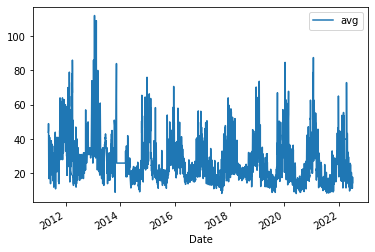

In [ ]:
pm25_avg.plot(x='Date', y='avg')

In [ ]:
print(pm25_2011['avg'].to_markdown())

# PM 10 data cleaning
To drop: 
- 2012 12T
- 2015 07T


In [ ]:
# Run this one time per runtime
pm10_2012.drop('12T', inplace=True, axis=1)
pm10_2015.drop('07T', inplace=True, axis=1)
pm10_2022.drop(pm10_2022.index[181:], inplace=True)

In [ ]:
pm10_2011['Date'] = pd.to_datetime(pm10_2011['Date'])
pm10_2011['02T'] = pd.to_numeric(pm10_2011['02T'], errors='coerce')
pm10_2011['03T'] = pd.to_numeric(pm10_2011['03T'], errors='coerce')
pm10_2011['05T'] = pd.to_numeric(pm10_2011['05T'], errors='coerce')
pm10_2011['07T'] = pd.to_numeric(pm10_2011['07T'], errors='coerce')
pm10_2011['10T'] = pd.to_numeric(pm10_2011['10T'], errors='coerce')
pm10_2011['11T'] = pd.to_numeric(pm10_2011['11T'], errors='coerce')
pm10_2011['12T'] = pd.to_numeric(pm10_2011['12T'], errors='coerce')
pm10_2011['15T'] = pd.to_numeric(pm10_2011['15T'], errors='coerce')
pm10_2011['59T'] = pd.to_numeric(pm10_2011['59T'], errors='coerce')
pm10_2011['61T'] = pd.to_numeric(pm10_2011['61T'], errors='coerce')
pm10_2011['48T'] = pd.to_numeric(pm10_2011['48T'], errors='coerce')
pm10_2011['49T'] = pd.to_numeric(pm10_2011['49T'], errors='coerce')
pm10_2011['50T'] = pd.to_numeric(pm10_2011['50T'], errors='coerce')
pm10_2011['52T'] = pd.to_numeric(pm10_2011['52T'], errors='coerce')
pm10_2011['53T'] = pd.to_numeric(pm10_2011['53T'], errors='coerce')
pm10_2011['54T'] = pd.to_numeric(pm10_2011['54T'], errors='coerce')

pm10_2012['Date'] = pd.to_datetime(pm10_2012['Date'])
pm10_2012['02T'] = pd.to_numeric(pm10_2012['02T'], errors='coerce')
pm10_2012['03T'] = pd.to_numeric(pm10_2012['03T'], errors='coerce')
pm10_2012['05T'] = pd.to_numeric(pm10_2012['05T'], errors='coerce')
pm10_2012['07T'] = pd.to_numeric(pm10_2012['07T'], errors='coerce')
pm10_2012['10T'] = pd.to_numeric(pm10_2012['10T'], errors='coerce')
pm10_2012['11T'] = pd.to_numeric(pm10_2012['11T'], errors='coerce')
pm10_2012['15T'] = pd.to_numeric(pm10_2012['15T'], errors='coerce')
pm10_2012['59T'] = pd.to_numeric(pm10_2012['59T'], errors='coerce')
pm10_2012['61T'] = pd.to_numeric(pm10_2012['61T'], errors='coerce')
pm10_2012['48T'] = pd.to_numeric(pm10_2012['48T'], errors='coerce')
pm10_2012['49T'] = pd.to_numeric(pm10_2012['49T'], errors='coerce')
pm10_2012['50T'] = pd.to_numeric(pm10_2012['50T'], errors='coerce')
pm10_2012['51T'] = pd.to_numeric(pm10_2012['51T'], errors='coerce')
pm10_2012['52T'] = pd.to_numeric(pm10_2012['52T'], errors='coerce')
pm10_2012['53T'] = pd.to_numeric(pm10_2012['53T'], errors='coerce')
pm10_2012['54T'] = pd.to_numeric(pm10_2012['54T'], errors='coerce')

pm10_2013['Date'] = pd.to_datetime(pm10_2013['Date'])
pm10_2013['02T'] = pd.to_numeric(pm10_2013['02T'], errors='coerce')
pm10_2013['03T'] = pd.to_numeric(pm10_2013['03T'], errors='coerce')
pm10_2013['05T'] = pd.to_numeric(pm10_2013['05T'], errors='coerce')
pm10_2013['07T'] = pd.to_numeric(pm10_2013['07T'], errors='coerce')
pm10_2013['10T'] = pd.to_numeric(pm10_2013['10T'], errors='coerce')
pm10_2013['11T'] = pd.to_numeric(pm10_2013['11T'], errors='coerce')
pm10_2013['12T'] = pd.to_numeric(pm10_2013['12T'], errors='coerce')
pm10_2013['15T'] = pd.to_numeric(pm10_2013['15T'], errors='coerce')
pm10_2013['59T'] = pd.to_numeric(pm10_2013['59T'], errors='coerce')
pm10_2013['61T'] = pd.to_numeric(pm10_2013['61T'], errors='coerce')
pm10_2013['48T'] = pd.to_numeric(pm10_2013['48T'], errors='coerce')
pm10_2013['49T'] = pd.to_numeric(pm10_2013['49T'], errors='coerce')
pm10_2013['50T'] = pd.to_numeric(pm10_2013['50T'], errors='coerce')
pm10_2013['52T'] = pd.to_numeric(pm10_2013['52T'], errors='coerce')
pm10_2013['53T'] = pd.to_numeric(pm10_2013['53T'], errors='coerce')
pm10_2013['54T'] = pd.to_numeric(pm10_2013['54T'], errors='coerce')

pm10_2014['Date'] = pd.to_datetime(pm10_2014['Date'])
pm10_2014['02T'] = pd.to_numeric(pm10_2014['02T'], errors='coerce')
pm10_2014['03T'] = pd.to_numeric(pm10_2014['03T'], errors='coerce')
pm10_2014['05T'] = pd.to_numeric(pm10_2014['05T'], errors='coerce')
pm10_2014['07T'] = pd.to_numeric(pm10_2014['07T'], errors='coerce')
pm10_2014['10T'] = pd.to_numeric(pm10_2014['10T'], errors='coerce')
pm10_2014['11T'] = pd.to_numeric(pm10_2014['11T'], errors='coerce')
pm10_2014['12T'] = pd.to_numeric(pm10_2014['12T'], errors='coerce')
pm10_2014['15T'] = pd.to_numeric(pm10_2014['15T'], errors='coerce')
pm10_2014['59T'] = pd.to_numeric(pm10_2014['59T'], errors='coerce')
pm10_2014['61T'] = pd.to_numeric(pm10_2014['61T'], errors='coerce')
pm10_2014['48T'] = pd.to_numeric(pm10_2014['48T'], errors='coerce')
pm10_2014['49T'] = pd.to_numeric(pm10_2014['49T'], errors='coerce')
pm10_2014['50T'] = pd.to_numeric(pm10_2014['50T'], errors='coerce')
pm10_2014['52T'] = pd.to_numeric(pm10_2014['52T'], errors='coerce')
pm10_2014['53T'] = pd.to_numeric(pm10_2014['53T'], errors='coerce')
pm10_2014['54T'] = pd.to_numeric(pm10_2014['54T'], errors='coerce')

pm10_2015['Date'] = pd.to_datetime(pm10_2015['Date'])
pm10_2015['02T'] = pd.to_numeric(pm10_2015['02T'], errors='coerce')
pm10_2015['03T'] = pd.to_numeric(pm10_2015['03T'], errors='coerce')
pm10_2015['05T'] = pd.to_numeric(pm10_2015['05T'], errors='coerce')
pm10_2015['10T'] = pd.to_numeric(pm10_2015['10T'], errors='coerce')
pm10_2015['11T'] = pd.to_numeric(pm10_2015['11T'], errors='coerce')
pm10_2015['12T'] = pd.to_numeric(pm10_2015['12T'], errors='coerce')
pm10_2015['15T'] = pd.to_numeric(pm10_2015['15T'], errors='coerce')
pm10_2015['59T'] = pd.to_numeric(pm10_2015['59T'], errors='coerce')
pm10_2015['61T'] = pd.to_numeric(pm10_2015['61T'], errors='coerce')
pm10_2015['48T'] = pd.to_numeric(pm10_2015['48T'], errors='coerce')
pm10_2015['49T'] = pd.to_numeric(pm10_2015['49T'], errors='coerce')
pm10_2015['50T'] = pd.to_numeric(pm10_2015['50T'], errors='coerce')
pm10_2015['52T'] = pd.to_numeric(pm10_2015['52T'], errors='coerce')
pm10_2015['53T'] = pd.to_numeric(pm10_2015['53T'], errors='coerce')
pm10_2015['54T'] = pd.to_numeric(pm10_2015['54T'], errors='coerce')

pm10_2016['Date'] = pd.to_datetime(pm10_2016['Date'])
pm10_2016['02T'] = pd.to_numeric(pm10_2016['02T'], errors='coerce')
pm10_2016['03T'] = pd.to_numeric(pm10_2016['03T'], errors='coerce')
pm10_2016['05T'] = pd.to_numeric(pm10_2016['05T'], errors='coerce')
pm10_2016['10T'] = pd.to_numeric(pm10_2016['10T'], errors='coerce')
pm10_2016['11T'] = pd.to_numeric(pm10_2016['11T'], errors='coerce')
pm10_2016['12T'] = pd.to_numeric(pm10_2016['12T'], errors='coerce')
pm10_2016['59T'] = pd.to_numeric(pm10_2016['59T'], errors='coerce')
pm10_2016['61T'] = pd.to_numeric(pm10_2016['61T'], errors='coerce')
pm10_2016['50T'] = pd.to_numeric(pm10_2016['50T'], errors='coerce')
pm10_2016['52T'] = pd.to_numeric(pm10_2016['52T'], errors='coerce')
pm10_2016['53T'] = pd.to_numeric(pm10_2016['53T'], errors='coerce')
pm10_2016['54T'] = pd.to_numeric(pm10_2016['54T'], errors='coerce')

pm10_2017['Date'] = pd.to_datetime(pm10_2017['Date'])
pm10_2017['02T'] = pd.to_numeric(pm10_2017['02T'], errors='coerce')
pm10_2017['03T'] = pd.to_numeric(pm10_2017['03T'], errors='coerce')
pm10_2017['05T'] = pd.to_numeric(pm10_2017['05T'], errors='coerce')
pm10_2017['10T'] = pd.to_numeric(pm10_2017['10T'], errors='coerce')
pm10_2017['11T'] = pd.to_numeric(pm10_2017['11T'], errors='coerce')
pm10_2017['12T'] = pd.to_numeric(pm10_2017['12T'], errors='coerce')
pm10_2017['59T'] = pd.to_numeric(pm10_2017['59T'], errors='coerce')
pm10_2017['61T'] = pd.to_numeric(pm10_2017['61T'], errors='coerce')
pm10_2017['50T'] = pd.to_numeric(pm10_2017['50T'], errors='coerce')
pm10_2017['52T'] = pd.to_numeric(pm10_2017['52T'], errors='coerce')
pm10_2017['53T'] = pd.to_numeric(pm10_2017['53T'], errors='coerce')
pm10_2017['54T'] = pd.to_numeric(pm10_2017['54T'], errors='coerce')

pm10_2018['Date'] = pd.to_datetime(pm10_2018['Date'])
pm10_2018['02T'] = pd.to_numeric(pm10_2018['02T'], errors='coerce')
pm10_2018['03T'] = pd.to_numeric(pm10_2018['03T'], errors='coerce')
pm10_2018['05T'] = pd.to_numeric(pm10_2018['05T'], errors='coerce')
pm10_2018['10T'] = pd.to_numeric(pm10_2018['10T'], errors='coerce')
pm10_2018['11T'] = pd.to_numeric(pm10_2018['11T'], errors='coerce')
pm10_2018['12T'] = pd.to_numeric(pm10_2018['12T'], errors='coerce')
pm10_2018['59T'] = pd.to_numeric(pm10_2018['59T'], errors='coerce')
pm10_2018['61T'] = pd.to_numeric(pm10_2018['61T'], errors='coerce')
pm10_2018['50T'] = pd.to_numeric(pm10_2018['50T'], errors='coerce')
pm10_2018['52T'] = pd.to_numeric(pm10_2018['52T'], errors='coerce')
pm10_2018['53T'] = pd.to_numeric(pm10_2018['53T'], errors='coerce')
pm10_2018['54T'] = pd.to_numeric(pm10_2018['54T'], errors='coerce')

pm10_2019['Date'] = pd.to_datetime(pm10_2019['Date'])
pm10_2019['02T'] = pd.to_numeric(pm10_2019['02T'], errors='coerce')
pm10_2019['03T'] = pd.to_numeric(pm10_2019['03T'], errors='coerce')
pm10_2019['05T'] = pd.to_numeric(pm10_2019['05T'], errors='coerce')
pm10_2019['10T'] = pd.to_numeric(pm10_2019['10T'], errors='coerce')
pm10_2019['11T'] = pd.to_numeric(pm10_2019['11T'], errors='coerce')
pm10_2019['12T'] = pd.to_numeric(pm10_2019['12T'], errors='coerce')
pm10_2019['59T'] = pd.to_numeric(pm10_2019['59T'], errors='coerce')
pm10_2019['61T'] = pd.to_numeric(pm10_2019['61T'], errors='coerce')
pm10_2019['50T'] = pd.to_numeric(pm10_2019['50T'], errors='coerce')
pm10_2019['52T'] = pd.to_numeric(pm10_2019['52T'], errors='coerce')
pm10_2019['53T'] = pd.to_numeric(pm10_2019['53T'], errors='coerce')
pm10_2019['54T'] = pd.to_numeric(pm10_2019['54T'], errors='coerce')

pm10_2020['Date'] = pd.to_datetime(pm10_2020['Date'])
pm10_2020['02T'] = pd.to_numeric(pm10_2020['02T'], errors='coerce')
pm10_2020['03T'] = pd.to_numeric(pm10_2020['03T'], errors='coerce')
pm10_2020['05T'] = pd.to_numeric(pm10_2020['05T'], errors='coerce')
pm10_2020['10T'] = pd.to_numeric(pm10_2020['10T'], errors='coerce')
pm10_2020['11T'] = pd.to_numeric(pm10_2020['11T'], errors='coerce')
pm10_2020['12T'] = pd.to_numeric(pm10_2020['12T'], errors='coerce')
pm10_2020['59T'] = pd.to_numeric(pm10_2020['59T'], errors='coerce')
pm10_2020['61T'] = pd.to_numeric(pm10_2020['61T'], errors='coerce')
pm10_2020['50T'] = pd.to_numeric(pm10_2020['50T'], errors='coerce')
pm10_2020['52T'] = pd.to_numeric(pm10_2020['52T'], errors='coerce')
pm10_2020['53T'] = pd.to_numeric(pm10_2020['53T'], errors='coerce')
pm10_2020['54T'] = pd.to_numeric(pm10_2020['54T'], errors='coerce')

pm10_2021['Date'] = pd.to_datetime(pm10_2021['Date'])
pm10_2021['02T'] = pd.to_numeric(pm10_2021['02T'], errors='coerce')
pm10_2021['03T'] = pd.to_numeric(pm10_2021['03T'], errors='coerce')
pm10_2021['05T'] = pd.to_numeric(pm10_2021['05T'], errors='coerce')
pm10_2021['10T'] = pd.to_numeric(pm10_2021['10T'], errors='coerce')
pm10_2021['11T'] = pd.to_numeric(pm10_2021['11T'], errors='coerce')
pm10_2021['12T'] = pd.to_numeric(pm10_2021['12T'], errors='coerce')
pm10_2021['59T'] = pd.to_numeric(pm10_2021['59T'], errors='coerce')
pm10_2021['61T'] = pd.to_numeric(pm10_2021['61T'], errors='coerce')
pm10_2021['50T'] = pd.to_numeric(pm10_2021['50T'], errors='coerce')
pm10_2021['52T'] = pd.to_numeric(pm10_2021['52T'], errors='coerce')
pm10_2021['53T'] = pd.to_numeric(pm10_2021['53T'], errors='coerce')
pm10_2021['54T'] = pd.to_numeric(pm10_2021['54T'], errors='coerce')

pm10_2022['Date'] = pd.to_datetime(pm10_2022['Date'])
pm10_2022['02T'] = pd.to_numeric(pm10_2022['02T'], errors='coerce')
pm10_2022['03T'] = pd.to_numeric(pm10_2022['03T'], errors='coerce')
pm10_2022['05T'] = pd.to_numeric(pm10_2022['05T'], errors='coerce')
pm10_2022['10T'] = pd.to_numeric(pm10_2022['10T'], errors='coerce')
pm10_2022['11T'] = pd.to_numeric(pm10_2022['11T'], errors='coerce')
pm10_2022['12T'] = pd.to_numeric(pm10_2022['12T'], errors='coerce')
pm10_2022['59T'] = pd.to_numeric(pm10_2022['59T'], errors='coerce')
pm10_2022['61T'] = pd.to_numeric(pm10_2022['61T'], errors='coerce')
pm10_2022['50T'] = pd.to_numeric(pm10_2022['50T'], errors='coerce')
pm10_2022['52T'] = pd.to_numeric(pm10_2022['52T'], errors='coerce')
pm10_2022['53T'] = pd.to_numeric(pm10_2022['53T'], errors='coerce')
pm10_2022['54T'] = pd.to_numeric(pm10_2022['54T'], errors='coerce')


In [ ]:
pm10_2011['02T'].interpolate(inplace=True)
pm10_2011['03T'].interpolate(inplace=True)
pm10_2011['05T'].interpolate(inplace=True)
pm10_2011['07T'].interpolate(inplace=True)
pm10_2011['10T'].interpolate(inplace=True)
pm10_2011['11T'].interpolate(inplace=True)
pm10_2011['12T'].interpolate(inplace=True)
pm10_2011['15T'].interpolate(inplace=True)
pm10_2011['59T'].interpolate(inplace=True)
pm10_2011['61T'].interpolate(inplace=True)
pm10_2011['48T'].interpolate(inplace=True)
pm10_2011['49T'].interpolate(inplace=True)
pm10_2011['50T'].interpolate(inplace=True)
pm10_2011['52T'].interpolate(inplace=True)
pm10_2011['53T'].interpolate(inplace=True)
pm10_2011['54T'].interpolate(inplace=True)
pm10_2011.fillna(method='bfill', inplace=True)

pm10_2012['02T'].interpolate(inplace=True)
pm10_2012['03T'].interpolate(inplace=True)
pm10_2012['05T'].interpolate(inplace=True)
pm10_2012['07T'].interpolate(inplace=True)
pm10_2012['10T'].interpolate(inplace=True)
pm10_2012['11T'].interpolate(inplace=True)
pm10_2012['15T'].interpolate(inplace=True)
pm10_2012['59T'].interpolate(inplace=True)
pm10_2012['61T'].interpolate(inplace=True)
pm10_2012['48T'].interpolate(inplace=True)
pm10_2012['49T'].interpolate(inplace=True)
pm10_2012['50T'].interpolate(inplace=True)
pm10_2012['51T'].interpolate(inplace=True)
pm10_2012['52T'].interpolate(inplace=True)
pm10_2012['53T'].interpolate(inplace=True)
pm10_2012['54T'].interpolate(inplace=True)
pm10_2012.fillna(method='bfill', inplace=True)

pm10_2013['02T'].interpolate(inplace=True)
pm10_2013['03T'].interpolate(inplace=True)
pm10_2013['05T'].interpolate(inplace=True)
pm10_2013['07T'].interpolate(inplace=True)
pm10_2013['10T'].interpolate(inplace=True)
pm10_2013['11T'].interpolate(inplace=True)
pm10_2013['12T'].interpolate(inplace=True)
pm10_2013['15T'].interpolate(inplace=True)
pm10_2013['59T'].interpolate(inplace=True)
pm10_2013['61T'].interpolate(inplace=True)
pm10_2013['48T'].interpolate(inplace=True)
pm10_2013['49T'].interpolate(inplace=True)
pm10_2013['50T'].interpolate(inplace=True)
pm10_2013['52T'].interpolate(inplace=True)
pm10_2013['53T'].interpolate(inplace=True)
pm10_2013['54T'].interpolate(inplace=True)
pm10_2013.fillna(method='bfill', inplace=True)

pm10_2014['02T'].interpolate(inplace=True)
pm10_2014['03T'].interpolate(inplace=True)
pm10_2014['05T'].interpolate(inplace=True)
pm10_2014['07T'].interpolate(inplace=True)
pm10_2014['10T'].interpolate(inplace=True)
pm10_2014['11T'].interpolate(inplace=True)
pm10_2014['12T'].interpolate(inplace=True)
pm10_2014['15T'].interpolate(inplace=True)
pm10_2014['59T'].interpolate(inplace=True)
pm10_2014['61T'].interpolate(inplace=True)
pm10_2014['48T'].interpolate(inplace=True)
pm10_2014['49T'].interpolate(inplace=True)
pm10_2014['50T'].interpolate(inplace=True)
pm10_2014['52T'].interpolate(inplace=True)
pm10_2014['53T'].interpolate(inplace=True)
pm10_2014['54T'].interpolate(inplace=True)
pm10_2014.fillna(method='bfill', inplace=True)

pm10_2015['02T'].interpolate(inplace=True)
pm10_2015['03T'].interpolate(inplace=True)
pm10_2015['05T'].interpolate(inplace=True)
pm10_2015['10T'].interpolate(inplace=True)
pm10_2015['11T'].interpolate(inplace=True)
pm10_2015['12T'].interpolate(inplace=True)
pm10_2015['15T'].interpolate(inplace=True)
pm10_2015['59T'].interpolate(inplace=True)
pm10_2015['61T'].interpolate(inplace=True)
pm10_2015['48T'].interpolate(inplace=True)
pm10_2015['49T'].interpolate(inplace=True)
pm10_2015['50T'].interpolate(inplace=True)
pm10_2015['52T'].interpolate(inplace=True)
pm10_2015['53T'].interpolate(inplace=True)
pm10_2015['54T'].interpolate(inplace=True)
pm10_2015.fillna(method='bfill', inplace=True)

pm10_2016['02T'].interpolate(inplace=True)
pm10_2016['03T'].interpolate(inplace=True)
pm10_2016['05T'].interpolate(inplace=True)
pm10_2016['10T'].interpolate(inplace=True)
pm10_2016['11T'].interpolate(inplace=True)
pm10_2016['12T'].interpolate(inplace=True)
pm10_2016['59T'].interpolate(inplace=True)
pm10_2016['61T'].interpolate(inplace=True)
pm10_2016['50T'].interpolate(inplace=True)
pm10_2016['52T'].interpolate(inplace=True)
pm10_2016['53T'].interpolate(inplace=True)
pm10_2016['54T'].interpolate(inplace=True)
pm10_2016.fillna(method='bfill', inplace=True)

pm10_2017['02T'].interpolate(inplace=True)
pm10_2017['03T'].interpolate(inplace=True)
pm10_2017['05T'].interpolate(inplace=True)
pm10_2017['10T'].interpolate(inplace=True)
pm10_2017['11T'].interpolate(inplace=True)
pm10_2017['12T'].interpolate(inplace=True)
pm10_2017['59T'].interpolate(inplace=True)
pm10_2017['61T'].interpolate(inplace=True)
pm10_2017['50T'].interpolate(inplace=True)
pm10_2017['52T'].interpolate(inplace=True)
pm10_2017['53T'].interpolate(inplace=True)
pm10_2017['54T'].interpolate(inplace=True)
pm10_2017.fillna(method='bfill', inplace=True)

pm10_2018['02T'].interpolate(inplace=True)
pm10_2018['03T'].interpolate(inplace=True)
pm10_2018['05T'].interpolate(inplace=True)
pm10_2018['10T'].interpolate(inplace=True)
pm10_2018['11T'].interpolate(inplace=True)
pm10_2018['12T'].interpolate(inplace=True)
pm10_2018['59T'].interpolate(inplace=True)
pm10_2018['61T'].interpolate(inplace=True)
pm10_2018['50T'].interpolate(inplace=True)
pm10_2018['52T'].interpolate(inplace=True)
# pm10_2018['53T'].interpolate(inplace=True)
pm10_2018['54T'].interpolate(inplace=True)
pm10_2018.fillna(method='bfill', inplace=True)

pm10_2018['02T'].interpolate(inplace=True)
pm10_2018['03T'].interpolate(inplace=True)
pm10_2018['05T'].interpolate(inplace=True)
pm10_2018['10T'].interpolate(inplace=True)
pm10_2018['11T'].interpolate(inplace=True)
pm10_2018['12T'].interpolate(inplace=True)
pm10_2018['59T'].interpolate(inplace=True)
pm10_2018['61T'].interpolate(inplace=True)
pm10_2018['50T'].interpolate(inplace=True)
pm10_2018['52T'].interpolate(inplace=True)
# pm10_2018['53T'].interpolate(inplace=True)
pm10_2018['54T'].interpolate(inplace=True)
pm10_2018.fillna(method='bfill', inplace=True)

pm10_2019['02T'].interpolate(inplace=True)
pm10_2019['03T'].interpolate(inplace=True)
# pm10_2019['05T'].interpolate(inplace=True)
pm10_2019['10T'].interpolate(inplace=True)
pm10_2019['11T'].interpolate(inplace=True)
pm10_2019['12T'].interpolate(inplace=True)
# pm10_2019['59T'].interpolate(inplace=True)
pm10_2019['61T'].interpolate(inplace=True)
# pm10_2019['50T'].interpolate(inplace=True)
pm10_2019['52T'].interpolate(inplace=True)
pm10_2019['53T'].interpolate(inplace=True)
pm10_2019['54T'].interpolate(inplace=True)
pm10_2019.fillna(method='bfill', inplace=True)

pm10_2020['02T'].interpolate(inplace=True)
pm10_2020['03T'].interpolate(inplace=True)
pm10_2020['05T'].interpolate(inplace=True)
pm10_2020['10T'].interpolate(inplace=True)
# pm10_2020['11T'].interpolate(inplace=True)
pm10_2020['12T'].interpolate(inplace=True)
# pm10_2020['59T'].interpolate(inplace=True)
pm10_2020['61T'].interpolate(inplace=True)
pm10_2020['50T'].interpolate(inplace=True)
# pm10_2020['52T'].interpolate(inplace=True)
pm10_2020['53T'].interpolate(inplace=True)
pm10_2020['54T'].interpolate(inplace=True)
pm10_2020.fillna(method='bfill', inplace=True)

pm10_2021['02T'].interpolate(inplace=True)
pm10_2021['03T'].interpolate(inplace=True)
# pm10_2021['05T'].interpolate(inplace=True)
pm10_2021['10T'].interpolate(inplace=True)
pm10_2021['11T'].interpolate(inplace=True)
pm10_2021['12T'].interpolate(inplace=True)
# pm10_2021['59T'].interpolate(inplace=True)
pm10_2021['61T'].interpolate(inplace=True)
pm10_2021['50T'].interpolate(inplace=True)
# pm10_2021['52T'].interpolate(inplace=True)
pm10_2021['53T'].interpolate(inplace=True)
pm10_2021['54T'].interpolate(inplace=True)
pm10_2021.fillna(method='bfill', inplace=True)

pm10_2022['02T'].interpolate(inplace=True)
pm10_2022['03T'].interpolate(inplace=True)
# pm10_2022['05T'].interpolate(inplace=True)
pm10_2022['10T'].interpolate(inplace=True)
pm10_2022['11T'].interpolate(inplace=True)
pm10_2022['12T'].interpolate(inplace=True)
# pm10_2022['59T'].interpolate(inplace=True)
pm10_2022['61T'].interpolate(inplace=True)
# pm10_2022['50T'].interpolate(inplace=True)
pm10_2022['52T'].interpolate(inplace=True)
pm10_2022['53T'].interpolate(inplace=True)
# pm10_2022['54T'].interpolate(inplace=True)

In [ ]:
pm10_2011['avg'] = pm10_2011.mean(axis=1)
pm10_2012['avg'] = pm10_2012.mean(axis=1)
pm10_2013['avg'] = pm10_2013.mean(axis=1)
pm10_2014['avg'] = pm10_2014.mean(axis=1)
pm10_2015['avg'] = pm10_2015.mean(axis=1)
pm10_2016['avg'] = pm10_2016.mean(axis=1)
pm10_2017['avg'] = pm10_2017.mean(axis=1)
pm10_2018['avg'] = pm10_2018.mean(axis=1)
pm10_2019['avg'] = pm10_2019.mean(axis=1)
pm10_2020['avg'] = pm10_2020.mean(axis=1)
pm10_2021['avg'] = pm10_2021.mean(axis=1)
pm10_2022['avg'] = pm10_2022.mean(axis=1)

In [ ]:
all_avg_df_10 = [pm10_2011['avg'], pm10_2012['avg'], pm10_2013['avg'], pm10_2014['avg'],
              pm10_2015['avg'], pm10_2016['avg'], pm10_2017['avg'], pm10_2018['avg'],
              pm10_2019['avg'], pm10_2020['avg'], pm10_2021['avg'], pm10_2022['avg']]
all_date_10 = [pm10_2011['Date'], pm10_2012['Date'], pm10_2013['Date'], pm10_2014['Date'],
              pm10_2015['Date'], pm10_2016['Date'], pm10_2017['Date'], pm10_2018['Date'],
              pm10_2019['Date'], pm10_2020['Date'], pm10_2021['Date'], pm10_2022['Date']]
pm10_avg_val = pd.concat(all_avg_df_10, ignore_index=True)
pm10_avg_date = pd.concat(all_date_10, ignore_index=True)
date_val = [pm10_avg_date, pm10_avg_val]
pm10_avg = pd.concat(date_val, axis=1)
pm10_avg

,Date,avg
0,2011-01-01,60.687500
1,2011-01-02,58.625000
2,2011-01-03,64.875000
3,2011-01-04,58.687500
4,2011-01-05,53.937500
...,...,...
4194,2022-06-26,27.166667
4195,2022-06-27,35.500000
4196,2022-06-28,37.083333
4197,2022-06-29,37.833333


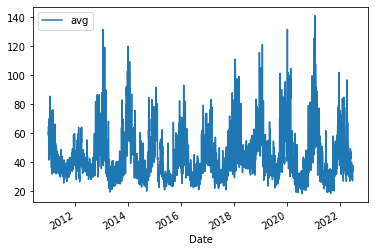

In [ ]:
pm10_avg.plot(x='Date', y='avg')

# LONGDO Traffic Index

1. Remove time
2. Group by --> Average values in same date
3. Set datetime as index
4. Reindex the missing dates (add missing dates value with NaN)
5. Linear Interpolate the NaN (fillna)
6. resetindex (datetime to column)

In [ ]:
traf_2012 = pd.read_csv("/content/trafficindex2012.csv")
traf_2013 = pd.read_csv("/content/trafficindex2013.csv")
traf_2014 = pd.read_csv("/content/trafficindex2014.csv")
traf_2015 = pd.read_csv("/content/trafficindex2015.csv")
traf_2016 = pd.read_csv("/content/trafficindex2016.csv")
traf_2017 = pd.read_csv("/content/trafficindex2017.csv")
traf_2018 = pd.read_csv("/content/trafficindex2018.csv")
traf_2019 = pd.read_csv("/content/trafficindex2019.csv")
traf_2020 = pd.read_csv("/content/trafficindex2020.csv")
traf_2021 = pd.read_csv("/content/trafficindex2021.csv")
traf_2022 = pd.read_csv("/content/trafficindex2022.csv")

In [ ]:
traf_2012.drop(columns="timestamp", inplace=True)
traf_2013.drop(columns="timestamp", inplace=True)
traf_2014.drop(columns="timestamp", inplace=True)
traf_2015.drop(columns="timestamp", inplace=True)
traf_2016.drop(columns="timestamp", inplace=True)
traf_2017.drop(columns="timestamp", inplace=True)
traf_2018.drop(columns="timestamp", inplace=True)
traf_2019.drop(columns="timestamp", inplace=True)
traf_2020.drop(columns="timestamp", inplace=True)
traf_2021.drop(columns="timestamp", inplace=True)
traf_2022.drop(columns="timestamp", inplace=True)

In [ ]:
# 2012
traf_2012['datetime'] = traf_2012['datetime'].str.split('T').str[0]
traf_2012['datetime'] = pd.to_datetime(traf_2012['datetime'], format="%Y-%m-%d")
down_2012 = traf_2012.groupby(['datetime']).mean()
idx_2012 = pd.date_range('2012-01-01', '2012-12-31')
down_2012.index = pd.DatetimeIndex(down_2012.index)
down_2012 = down_2012.reindex(idx_2012)
down_2012['index'].interpolate(inplace=True)
down_2012.fillna(method='bfill', inplace=True)
trafidx_2012 = down_2012.reset_index()

# 2013
traf_2013['datetime'] = traf_2013['datetime'].str.split('T').str[0]
traf_2013['datetime'] = pd.to_datetime(traf_2013['datetime'], format="%Y-%m-%d")
down_2013 = traf_2013.groupby(['datetime']).mean()
idx_2013 = pd.date_range('2013-01-01', '2013-12-31')
down_2013.index = pd.DatetimeIndex(down_2013.index)
down_2013 = down_2013.reindex(idx_2013)
down_2013['index'].interpolate(inplace=True)
down_2013.fillna(method='bfill', inplace=True)
trafidx_2013 = down_2013.reset_index()

# 2014
traf_2014['datetime'] = traf_2014['datetime'].str.split('T').str[0]
traf_2014['datetime'] = pd.to_datetime(traf_2014['datetime'], format="%Y-%m-%d")
down_2014 = traf_2014.groupby(['datetime']).mean()
idx_2014 = pd.date_range('2014-01-01', '2014-12-31')
down_2014.index = pd.DatetimeIndex(down_2014.index)
down_2014 = down_2014.reindex(idx_2014)
down_2014['index'].interpolate(inplace=True)
down_2014.fillna(method='bfill', inplace=True)
trafidx_2014 = down_2014.reset_index()

# 2015
traf_2015['datetime'] = traf_2015['datetime'].str.split('T').str[0]
traf_2015['datetime'] = pd.to_datetime(traf_2015['datetime'], format="%Y-%m-%d")
down_2015 = traf_2015.groupby(['datetime']).mean()
idx_2015 = pd.date_range('2015-01-01', '2015-12-31')
down_2015.index = pd.DatetimeIndex(down_2015.index)
down_2015 = down_2015.reindex(idx_2015)
down_2015['index'].interpolate(inplace=True)
down_2015.fillna(method='bfill', inplace=True)
trafidx_2015 = down_2015.reset_index()

# 2016
traf_2016['datetime'] = traf_2016['datetime'].str.split('T').str[0]
traf_2016['datetime'] = pd.to_datetime(traf_2016['datetime'], format="%Y-%m-%d")
down_2016 = traf_2016.groupby(['datetime']).mean()
idx_2016 = pd.date_range('2016-01-01', '2016-12-31')
down_2016.index = pd.DatetimeIndex(down_2016.index)
down_2016 = down_2016.reindex(idx_2016)
down_2016['index'].interpolate(inplace=True)
down_2016.fillna(method='bfill', inplace=True)
trafidx_2016 = down_2016.reset_index()

# 2017
traf_2017['datetime'] = traf_2017['datetime'].str.split('T').str[0]
traf_2017['datetime'] = pd.to_datetime(traf_2017['datetime'], format="%Y-%m-%d")
down_2017 = traf_2017.groupby(['datetime']).mean()
idx_2017 = pd.date_range('2017-01-01', '2017-12-31')
down_2017.index = pd.DatetimeIndex(down_2017.index)
down_2017 = down_2017.reindex(idx_2017)
down_2017['index'].interpolate(inplace=True)
down_2017.fillna(method='bfill', inplace=True)
trafidx_2017 = down_2017.reset_index()

# 2018
traf_2018['datetime'] = traf_2018['datetime'].str.split('T').str[0]
traf_2018['datetime'] = pd.to_datetime(traf_2018['datetime'], format="%Y-%m-%d")
down_2018 = traf_2018.groupby(['datetime']).mean()
idx_2018 = pd.date_range('2018-01-01', '2018-12-31')
down_2018.index = pd.DatetimeIndex(down_2018.index)
down_2018 = down_2018.reindex(idx_2018)
down_2018['index'].interpolate(inplace=True)
down_2018.fillna(method='bfill', inplace=True)
trafidx_2018 = down_2018.reset_index()

# 2019
traf_2019['datetime'] = traf_2019['datetime'].str.split('T').str[0]
traf_2019['datetime'] = pd.to_datetime(traf_2019['datetime'], format="%Y-%m-%d")
down_2019 = traf_2019.groupby(['datetime']).mean()
idx_2019 = pd.date_range('2019-01-01', '2019-12-31')
down_2019.index = pd.DatetimeIndex(down_2019.index)
down_2019 = down_2019.reindex(idx_2019)
down_2019['index'].interpolate(inplace=True)
down_2019.fillna(method='bfill', inplace=True)
trafidx_2019 = down_2019.reset_index()

# 2020
traf_2020['datetime'] = traf_2020['datetime'].str.split('T').str[0]
traf_2020['datetime'] = pd.to_datetime(traf_2020['datetime'], format="%Y-%m-%d")
down_2020 = traf_2020.groupby(['datetime']).mean()
idx_2020 = pd.date_range('2020-01-01', '2020-12-31')
down_2020.index = pd.DatetimeIndex(down_2020.index)
down_2020 = down_2020.reindex(idx_2020)
down_2020['index'].interpolate(inplace=True)
down_2020.fillna(method='bfill', inplace=True)
trafidx_2020 = down_2020.reset_index()

# 2021
traf_2021['datetime'] = traf_2021['datetime'].str.split('T').str[0]
traf_2021['datetime'] = pd.to_datetime(traf_2021['datetime'], format="%Y-%m-%d")
down_2021 = traf_2021.groupby(['datetime']).mean()
idx_2021 = pd.date_range('2021-01-01', '2021-12-31')
down_2021.index = pd.DatetimeIndex(down_2021.index)
down_2021 = down_2021.reindex(idx_2021)
down_2021['index'].interpolate(inplace=True)
down_2021.fillna(method='bfill', inplace=True)
trafidx_2021 = down_2021.reset_index()

# 2022
traf_2022['datetime'] = traf_2022['datetime'].str.split('T').str[0]
traf_2022['datetime'] = pd.to_datetime(traf_2022['datetime'], format="%Y-%m-%d")
down_2022 = traf_2022.groupby(['datetime']).mean()
idx_2022 = pd.date_range('2022-01-01', '2022-12-31')
down_2022.index = pd.DatetimeIndex(down_2022.index)
down_2022 = down_2022.reindex(idx_2022)
down_2022['index'].interpolate(inplace=True)
down_2022.fillna(method='bfill', inplace=True)
trafidx_2022 = down_2022.reset_index()

In [ ]:
trafidx_2022.drop(trafidx_2022.index[181:], inplace=True)

In [ ]:
print(trafidx_2022.to_markdown())

|     | level_0             |   index |
|----:|:--------------------|--------:|
|   0 | 2022-01-01 00:00:00 | 3.46007 |
|   1 | 2022-01-02 00:00:00 | 3.46007 |
|   2 | 2022-01-03 00:00:00 | 3.46007 |
|   3 | 2022-01-04 00:00:00 | 3.46007 |
|   4 | 2022-01-05 00:00:00 | 3.46007 |
|   5 | 2022-01-06 00:00:00 | 3.46007 |
|   6 | 2022-01-07 00:00:00 | 3.46007 |
|   7 | 2022-01-08 00:00:00 | 3.46007 |
|   8 | 2022-01-09 00:00:00 | 3.46007 |
|   9 | 2022-01-10 00:00:00 | 3.46007 |
|  10 | 2022-01-11 00:00:00 | 3.46007 |
|  11 | 2022-01-12 00:00:00 | 3.46007 |
|  12 | 2022-01-13 00:00:00 | 3.46007 |
|  13 | 2022-01-14 00:00:00 | 3.46007 |
|  14 | 2022-01-15 00:00:00 | 3.46007 |
|  15 | 2022-01-16 00:00:00 | 3.46007 |
|  16 | 2022-01-17 00:00:00 | 3.46007 |
|  17 | 2022-01-18 00:00:00 | 3.46007 |
|  18 | 2022-01-19 00:00:00 | 3.46007 |
|  19 | 2022-01-20 00:00:00 | 3.46007 |
|  20 | 2022-01-21 00:00:00 | 3.46007 |
|  21 | 2022-01-22 00:00:00 | 3.46007 |
|  22 | 2022-01-23 00:00:00 | 3.46007 |


In [ ]:
print(pm10_2022.to_markdown())

|     | Date                |      02T |   05T |     10T |   11T |     12T |   59T |   61T |      03T |   50T |     52T |     53T |   54T |     avg |
|----:|:--------------------|---------:|------:|--------:|------:|--------:|------:|------:|---------:|------:|--------:|--------:|------:|--------:|
|   0 | 2022-01-01 00:00:00 |  38      |    29 | 33      |    27 | 35      |    26 | 41    |  57      |    37 | 40      | 41      |    51 | 37.9167 |
|   1 | 2022-01-02 00:00:00 |  41      |    34 | 38      |    26 | 37      |    29 | 42    |  51      |    39 | 41      | 43      |    49 | 39.1667 |
|   2 | 2022-01-03 00:00:00 |  44      |    35 | 40      |    32 | 40      |    32 | 46    |  61      |    43 | 47      | 53      |    54 | 43.9167 |
|   3 | 2022-01-04 00:00:00 |  57      |    46 | 54      |    42 | 52      |    42 | 59    |  72      |    63 | 60      | 72      |    82 | 58.4167 |
|   4 | 2022-01-05 00:00:00 |  66      |    67 | 59      |    37 | 68      |    50 | 65    |  96    

# Stationarity

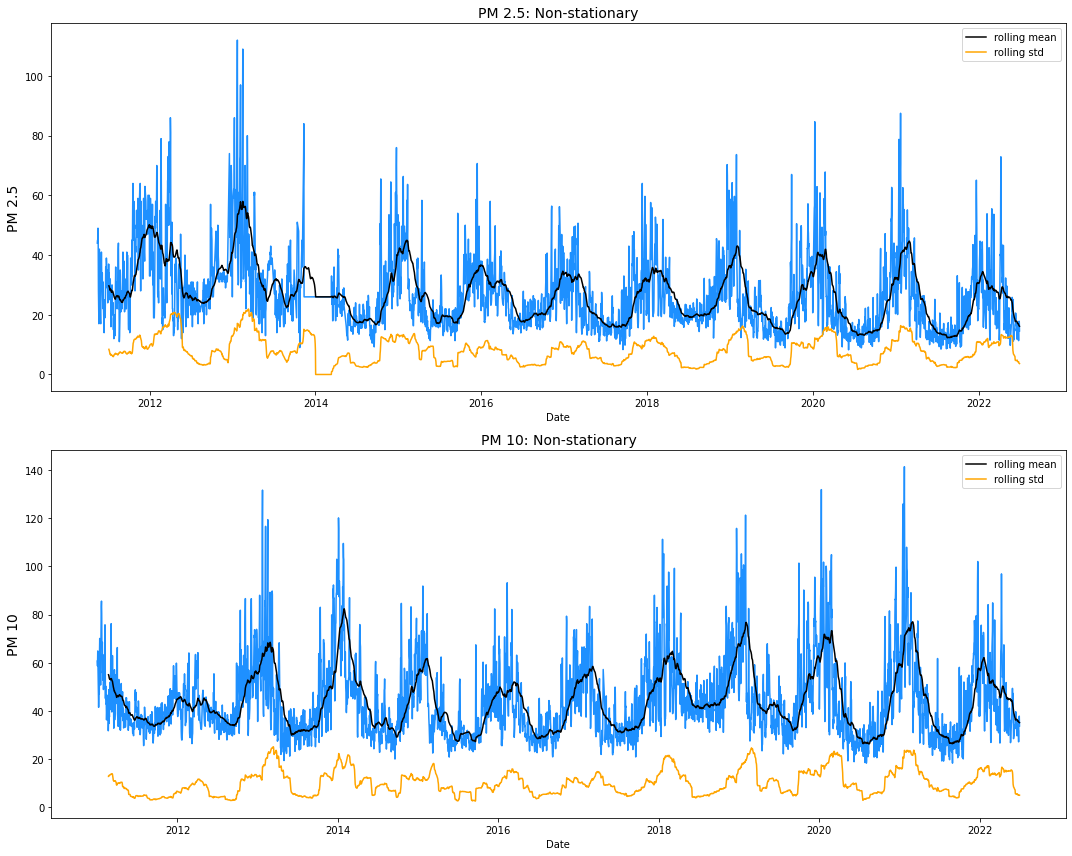

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=pm25_avg['Date'], y=pm25_avg['avg'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=pm25_avg['Date'], y=pm25_avg['avg'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=pm25_avg['Date'], y=pm25_avg['avg'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('PM 2.5: Non-stationary', fontsize=14)
ax[0].set_ylabel(ylabel='PM 2.5', fontsize=14)

sns.lineplot(x=pm10_avg['Date'], y=pm10_avg['avg'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=pm10_avg['Date'], y=pm10_avg['avg'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=pm10_avg['Date'], y=pm10_avg['avg'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('PM 10: Non-stationary', fontsize=14)
ax[1].set_ylabel(ylabel='PM 10', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result_pm25 = adfuller(pm25_avg['avg'].values)
result_pm10 = adfuller(pm10_avg['avg'].values)
print("PM 2.5 Result")
print(result_pm25)
print("PM 10 Result")
print(result_pm10)

PM 2.5 Result
(-5.377517923083784, 3.7756267854525227e-06, 20, 4043, {'1%': -3.4319684656757223, '5%': -2.8622551495651, '10%': -2.5671506813705425}, 26129.72867558558)
PM 10 Result
(-5.297824324825364, 5.532761282544979e-06, 20, 4178, {'1%': -3.4319161374491083, '5%': -2.8622320334364173, '10%': -2.5671383753784727}, 28843.906081456407)


# Exploratory Data Analysis

https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [ ]:
trafidx_2022.drop(trafidx_2022.index[181:365], inplace=True)

In [ ]:
# Finding correlation between PM data and traffic index
# PM 2.5
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Pearson’s Correlation
# The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.
corr2012, _ = pearsonr(pm25_2012['avg'], trafidx_2012['index'])
corr2013, _ = pearsonr(pm25_2013['avg'], trafidx_2013['index'])
corr2014, _ = pearsonr(pm25_2014['avg'], trafidx_2014['index'])
corr2015, _ = pearsonr(pm25_2015['avg'], trafidx_2015['index'])
corr2016, _ = pearsonr(pm25_2016['avg'], trafidx_2016['index'])
corr2017, _ = pearsonr(pm25_2017['avg'], trafidx_2017['index'])
corr2018, _ = pearsonr(pm25_2018['avg'], trafidx_2018['index'])
corr2019, _ = pearsonr(pm25_2019['avg'], trafidx_2019['index'])
corr2020, _ = pearsonr(pm25_2020['avg'], trafidx_2020['index'])
corr2021, _ = pearsonr(pm25_2021['avg'], trafidx_2021['index'])
corr2022, _ = pearsonr(pm25_2022['avg'], trafidx_2022['index'])

print('2012 Pearsons correlation: %.3f' % corr2012)
print('2013 Pearsons correlation: %.3f' % corr2013)
print('2014 Pearsons correlation: %.3f' % corr2014)
print('2015 Pearsons correlation: %.3f' % corr2015)
print('2016 Pearsons correlation: %.3f' % corr2016)
print('2017 Pearsons correlation: %.3f' % corr2017)
print('2018 Pearsons correlation: %.3f' % corr2018)
print('2019 Pearsons correlation: %.3f' % corr2019)
print('2020 Pearsons correlation: %.3f' % corr2020)
print('2021 Pearsons correlation: %.3f' % corr2021)
print('2022 Pearsons correlation: %.3f' % corr2022)

print("===========================================")

# Spearman's Correlation
# Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.
# Further, the two variables being considered may have a non-Gaussian distribution.
spears2012, _ = spearmanr(pm25_2012['avg'], trafidx_2012['index'])
spears2013, _ = spearmanr(pm25_2013['avg'], trafidx_2013['index'])
spears2014, _ = spearmanr(pm25_2014['avg'], trafidx_2014['index'])
spears2015, _ = spearmanr(pm25_2015['avg'], trafidx_2015['index'])
spears2016, _ = spearmanr(pm25_2016['avg'], trafidx_2016['index'])
spears2017, _ = spearmanr(pm25_2017['avg'], trafidx_2017['index'])
spears2018, _ = spearmanr(pm25_2018['avg'], trafidx_2018['index'])
spears2019, _ = spearmanr(pm25_2019['avg'], trafidx_2019['index'])
spears2020, _ = spearmanr(pm25_2020['avg'], trafidx_2020['index'])
spears2021, _ = spearmanr(pm25_2021['avg'], trafidx_2021['index'])
spears2022, _ = spearmanr(pm25_2022['avg'], trafidx_2022['index'])

print('2012 Spearmans correlation: %.3f' % spears2012)
print('2013 Spearmans correlation: %.3f' % spears2013)
print('2014 Spearmans correlation: %.3f' % spears2014)
print('2015 Spearmans correlation: %.3f' % spears2015)
print('2016 Spearmans correlation: %.3f' % spears2016)
print('2017 Spearmans correlation: %.3f' % spears2017)
print('2018 Spearmans correlation: %.3f' % spears2018)
print('2019 Spearmans correlation: %.3f' % spears2019)
print('2020 Spearmans correlation: %.3f' % spears2020)
print('2021 Spearmans correlation: %.3f' % spears2021)
print('2022 Spearmans correlation: %.3f' % spears2022)

2012 Pearsons correlation: 0.069
2013 Pearsons correlation: 0.056
2014 Pearsons correlation: -0.143
2015 Pearsons correlation: 0.023
2016 Pearsons correlation: 0.046
2017 Pearsons correlation: 0.047
2018 Pearsons correlation: 0.034
2019 Pearsons correlation: -0.139
2020 Pearsons correlation: 0.022
2021 Pearsons correlation: 0.218
2022 Pearsons correlation: -0.324
2012 Spearmans correlation: -0.029
2013 Spearmans correlation: 0.053
2014 Spearmans correlation: -0.124
2015 Spearmans correlation: 0.069
2016 Spearmans correlation: 0.057
2017 Spearmans correlation: 0.016
2018 Spearmans correlation: -0.158
2019 Spearmans correlation: -0.195
2020 Spearmans correlation: -0.032
2021 Spearmans correlation: 0.332
2022 Spearmans correlation: -0.413


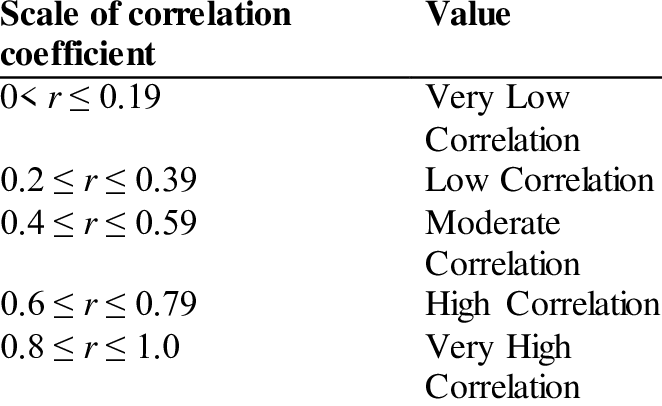

In [ ]:
# Finding correlation between PM data and traffic index
# PM 10
# from scipy.stats import pearsonr
# from scipy.stats import spearmanr

# Pearson’s Correlation
# The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.
corr2012T, _ = pearsonr(pm10_2012['avg'], trafidx_2012['index'])
corr2013T, _ = pearsonr(pm10_2013['avg'], trafidx_2013['index'])
corr2014T, _ = pearsonr(pm10_2014['avg'], trafidx_2014['index'])
corr2015T, _ = pearsonr(pm10_2015['avg'], trafidx_2015['index'])
corr2016T, _ = pearsonr(pm10_2016['avg'], trafidx_2016['index'])
corr2017T, _ = pearsonr(pm10_2017['avg'], trafidx_2017['index'])
corr2018T, _ = pearsonr(pm10_2018['avg'], trafidx_2018['index'])
corr2019T, _ = pearsonr(pm10_2019['avg'], trafidx_2019['index'])
corr2020T, _ = pearsonr(pm10_2020['avg'], trafidx_2020['index'])
corr2021T, _ = pearsonr(pm10_2021['avg'], trafidx_2021['index'])
corr2022T, _ = pearsonr(pm10_2022['avg'], trafidx_2022['index'])

print('2012 Pearsons correlation: %.3f' % corr2012T)
print('2013 Pearsons correlation: %.3f' % corr2013T)
print('2014 Pearsons correlation: %.3f' % corr2014T)
print('2015 Pearsons correlation: %.3f' % corr2015T)
print('2016 Pearsons correlation: %.3f' % corr2016T)
print('2017 Pearsons correlation: %.3f' % corr2017T)
print('2018 Pearsons correlation: %.3f' % corr2018T)
print('2019 Pearsons correlation: %.3f' % corr2019T)
print('2020 Pearsons correlation: %.3f' % corr2020T)
print('2021 Pearsons correlation: %.3f' % corr2021T)
print('2022 Pearsons correlation: %.3f' % corr2022T)

print("===========================================")

# Spearman's Correlation
# Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.
# Further, the two variables being considered may have a non-Gaussian distribution.
spears2012T, _ = spearmanr(pm10_2012['avg'], trafidx_2012['index'])
spears2013T, _ = spearmanr(pm10_2013['avg'], trafidx_2013['index'])
spears2014T, _ = spearmanr(pm10_2014['avg'], trafidx_2014['index'])
spears2015T, _ = spearmanr(pm10_2015['avg'], trafidx_2015['index'])
spears2016T, _ = spearmanr(pm10_2016['avg'], trafidx_2016['index'])
spears2017T, _ = spearmanr(pm10_2017['avg'], trafidx_2017['index'])
spears2018T, _ = spearmanr(pm10_2018['avg'], trafidx_2018['index'])
spears2019T, _ = spearmanr(pm10_2019['avg'], trafidx_2019['index'])
spears2020T, _ = spearmanr(pm10_2020['avg'], trafidx_2020['index'])
spears2021T, _ = spearmanr(pm10_2021['avg'], trafidx_2021['index'])
spears2022T, _ = spearmanr(pm10_2022['avg'], trafidx_2022['index'])

print('2012 Spearmans correlation: %.3f' % spears2012T)
print('2013 Spearmans correlation: %.3f' % spears2013T)
print('2014 Spearmans correlation: %.3f' % spears2014T)
print('2015 Spearmans correlation: %.3f' % spears2015T)
print('2016 Spearmans correlation: %.3f' % spears2016T)
print('2017 Spearmans correlation: %.3f' % spears2017T)
print('2018 Spearmans correlation: %.3f' % spears2018T)
print('2019 Spearmans correlation: %.3f' % spears2019T)
print('2020 Spearmans correlation: %.3f' % spears2020T)
print('2021 Spearmans correlation: %.3f' % spears2021T)
print('2022 Spearmans correlation: %.3f' % spears2022T)

2012 Pearsons correlation: -0.052
2013 Pearsons correlation: 0.103
2014 Pearsons correlation: 0.053
2015 Pearsons correlation: 0.062
2016 Pearsons correlation: 0.067
2017 Pearsons correlation: 0.089
2018 Pearsons correlation: 0.042
2019 Pearsons correlation: -0.090
2020 Pearsons correlation: 0.061
2021 Pearsons correlation: 0.243
2022 Pearsons correlation: -0.312
2012 Spearmans correlation: -0.098
2013 Spearmans correlation: 0.140
2014 Spearmans correlation: 0.034
2015 Spearmans correlation: 0.096
2016 Spearmans correlation: 0.059
2017 Spearmans correlation: 0.076
2018 Spearmans correlation: -0.106
2019 Spearmans correlation: -0.124
2020 Spearmans correlation: 0.026
2021 Spearmans correlation: 0.345
2022 Spearmans correlation: -0.370


In [ ]:
# PM2.5 and PM10
from scipy.stats import pearsonr
from scipy.stats import spearmanr

corr2012s, _ = pearsonr(pm10_2012['avg'], pm25_2012['avg'])
corr2013s, _ = pearsonr(pm10_2013['avg'], pm25_2013['avg'])
corr2014s, _ = pearsonr(pm10_2014['avg'], pm25_2014['avg'])
corr2015s, _ = pearsonr(pm10_2015['avg'], pm25_2015['avg'])
corr2016s, _ = pearsonr(pm10_2016['avg'], pm25_2016['avg'])
corr2017s, _ = pearsonr(pm10_2017['avg'], pm25_2017['avg'])
corr2018s, _ = pearsonr(pm10_2018['avg'], pm25_2018['avg'])
corr2019s, _ = pearsonr(pm10_2019['avg'], pm25_2019['avg'])
corr2020s, _ = pearsonr(pm10_2020['avg'], pm25_2020['avg'])
corr2021s, _ = pearsonr(pm10_2021['avg'], pm25_2021['avg'])
corr2022s, _ = pearsonr(pm10_2022['avg'], pm25_2022['avg'])

print('2012 Pearsons correlation: %.3f' % corr2012s)
print('2013 Pearsons correlation: %.3f' % corr2013s)
print('2014 Pearsons correlation: %.3f' % corr2014s)
print('2015 Pearsons correlation: %.3f' % corr2015s)
print('2016 Pearsons correlation: %.3f' % corr2016s)
print('2017 Pearsons correlation: %.3f' % corr2017s)
print('2018 Pearsons correlation: %.3f' % corr2018s)
print('2019 Pearsons correlation: %.3f' % corr2019s)
print('2020 Pearsons correlation: %.3f' % corr2020s)
print('2021 Pearsons correlation: %.3f' % corr2021s)
print('2022 Pearsons correlation: %.3f' % corr2022s)

print("===========================================")

spears2012s, _ = spearmanr(pm10_2012['avg'], pm25_2012['avg'])
spears2013s, _ = spearmanr(pm10_2013['avg'], pm25_2013['avg'])
spears2014s, _ = spearmanr(pm10_2014['avg'], pm25_2014['avg'])
spears2015s, _ = spearmanr(pm10_2015['avg'], pm25_2015['avg'])
spears2016s, _ = spearmanr(pm10_2016['avg'], pm25_2016['avg'])
spears2017s, _ = spearmanr(pm10_2017['avg'], pm25_2017['avg'])
spears2018s, _ = spearmanr(pm10_2018['avg'], pm25_2018['avg'])
spears2019s, _ = spearmanr(pm10_2019['avg'], pm25_2019['avg'])
spears2020s, _ = spearmanr(pm10_2020['avg'], pm25_2020['avg'])
spears2021s, _ = spearmanr(pm10_2021['avg'], pm25_2021['avg'])
spears2022s, _ = spearmanr(pm10_2022['avg'], pm25_2022['avg'])

print('2012 Spearmans correlation: %.3f' % spears2012s)
print('2013 Spearmans correlation: %.3f' % spears2013s)
print('2014 Spearmans correlation: %.3f' % spears2014s)
print('2015 Spearmans correlation: %.3f' % spears2015s)
print('2016 Spearmans correlation: %.3f' % spears2016s)
print('2017 Spearmans correlation: %.3f' % spears2017s)
print('2018 Spearmans correlation: %.3f' % spears2018s)
print('2019 Spearmans correlation: %.3f' % spears2019s)
print('2020 Spearmans correlation: %.3f' % spears2020s)
print('2021 Spearmans correlation: %.3f' % spears2021s)
print('2022 Spearmans correlation: %.3f' % spears2022s)

2012 Pearsons correlation: 0.672
2013 Pearsons correlation: 0.616
2014 Pearsons correlation: 0.626
2015 Pearsons correlation: 0.963
2016 Pearsons correlation: 0.960
2017 Pearsons correlation: 0.971
2018 Pearsons correlation: 0.977
2019 Pearsons correlation: 0.983
2020 Pearsons correlation: 0.991
2021 Pearsons correlation: 0.991
2022 Pearsons correlation: 0.986
2012 Spearmans correlation: 0.803
2013 Spearmans correlation: 0.546
2014 Spearmans correlation: 0.847
2015 Spearmans correlation: 0.947
2016 Spearmans correlation: 0.959
2017 Spearmans correlation: 0.966
2018 Spearmans correlation: 0.958
2019 Spearmans correlation: 0.971
2020 Spearmans correlation: 0.987
2021 Spearmans correlation: 0.990
2022 Spearmans correlation: 0.983


In [ ]:
all_traf_date = [trafidx_2012['level_0'], trafidx_2013['level_0'], trafidx_2014['level_0'],
              trafidx_2015['level_0'], trafidx_2016['level_0'], trafidx_2017['level_0'], trafidx_2018['level_0'],
              trafidx_2019['level_0'], trafidx_2020['level_0'], trafidx_2021['level_0'], trafidx_2022['level_0']]
all_traf_idx = [trafidx_2012['index'], trafidx_2013['index'], trafidx_2014['index'],
              trafidx_2015['index'], trafidx_2016['index'], trafidx_2017['index'], trafidx_2018['index'],
              trafidx_2019['index'], trafidx_2020['index'], trafidx_2021['index'], trafidx_2022['index']]
traf_date = pd.concat(all_traf_date, ignore_index=True)
traf_val = pd.concat(all_traf_idx, ignore_index=True)
date_val_traf = [traf_date, traf_val]
traf_concat = pd.concat(date_val_traf, axis=1)
traf_concat

,level_0,index
0,2012-01-01,0.130672
1,2012-01-02,0.246154
2,2012-01-03,0.553285
3,2012-01-04,2.571004
4,2012-01-05,2.864561
...,...,...
3829,2022-06-26,3.294792
3830,2022-06-27,3.998958
3831,2022-06-28,4.219097
3832,2022-06-29,4.228125


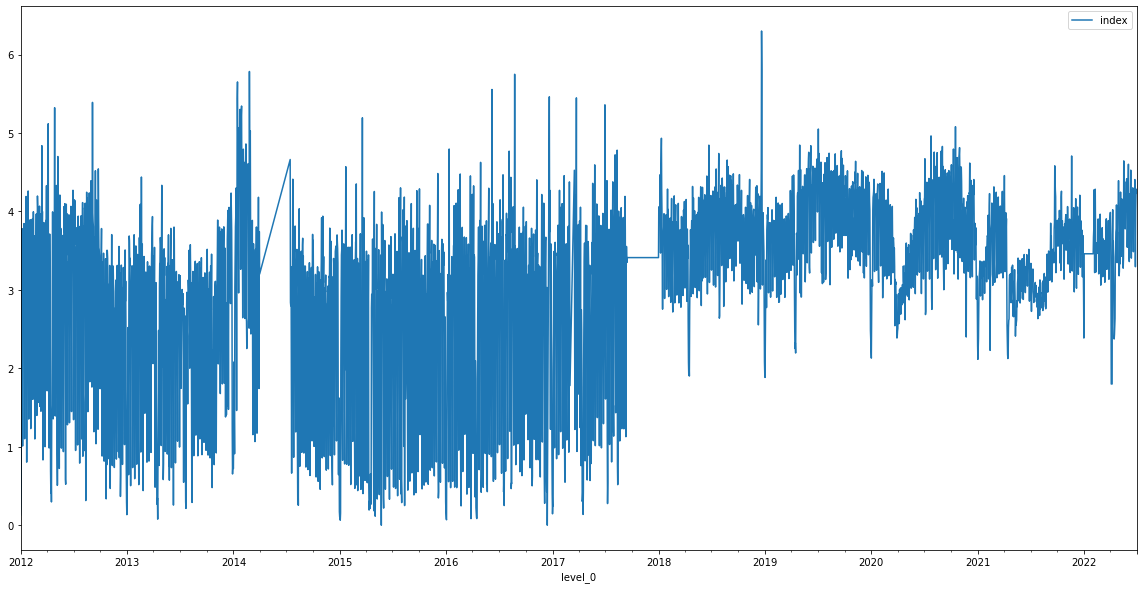

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
traf_concat.plot(ax=ax, x='level_0', y='index')

In [ ]:
# https://www.thumbsup.in.th/wongnai-trend-delivery

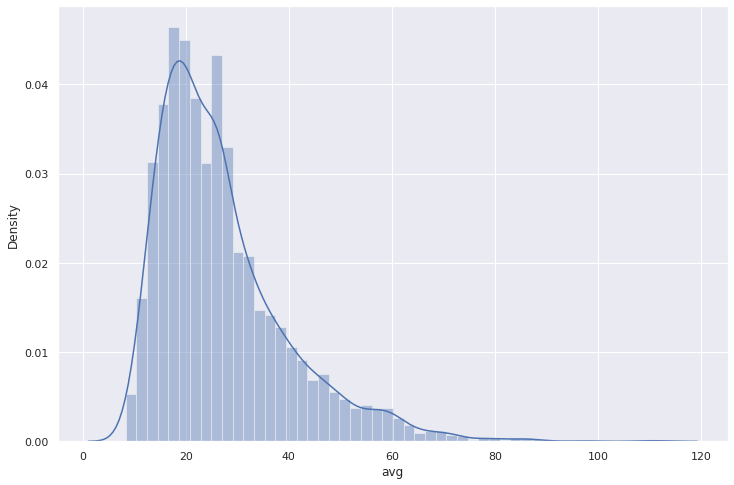

In [ ]:
# Plotting histogram
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(pm25_avg['avg'])

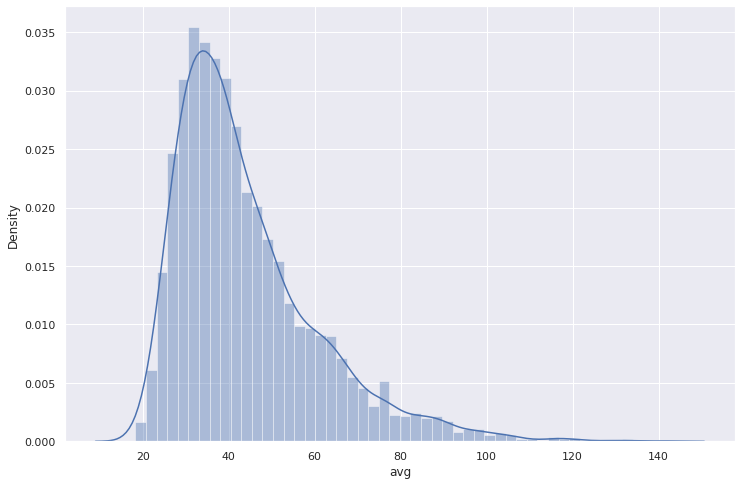

In [ ]:
sns.distplot(pm10_avg['avg'])

In [ ]:
print("PM2.5 Skewness: %f" % pm25_avg['avg'].skew())
print("PM2.5 Kurtosis: %f" % pm25_avg['avg'].kurt())
print("=====================")
print("PM10 Skewness: %f" % pm10_avg['avg'].skew())
print("PM10 Kurtosis: %f" % pm10_avg['avg'].kurt())

PM2.5 Skewness: 1.486183
PM2.5 Kurtosis: 3.030559
PM10 Skewness: 1.412043
PM10 Kurtosis: 2.506430


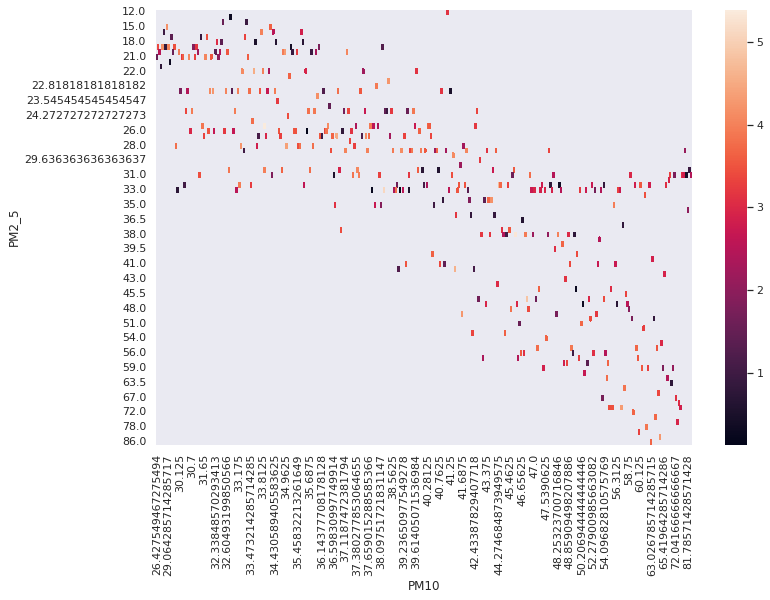

In [ ]:
test_data_plot = pd.DataFrame({'PM2_5': pm25_2012['avg'], 'PM10': pm10_2012['avg'], 'Traf': trafidx_2012['index']})
test_pivoted = test_data_plot.pivot("PM2_5", "PM10", "Traf")
ax = sns.heatmap(test_pivoted)
plt.show()

In [ ]:
print(pm10_avg.to_markdown())

|      | Date                |      avg |
|-----:|:--------------------|---------:|
|    0 | 2011-01-01 00:00:00 |  60.6875 |
|    1 | 2011-01-02 00:00:00 |  58.625  |
|    2 | 2011-01-03 00:00:00 |  64.875  |
|    3 | 2011-01-04 00:00:00 |  58.6875 |
|    4 | 2011-01-05 00:00:00 |  53.9375 |
|    5 | 2011-01-06 00:00:00 |  49.4375 |
|    6 | 2011-01-07 00:00:00 |  41.5    |
|    7 | 2011-01-08 00:00:00 |  47.25   |
|    8 | 2011-01-09 00:00:00 |  51.25   |
|    9 | 2011-01-10 00:00:00 |  47.15   |
|   10 | 2011-01-11 00:00:00 |  63.9875 |
|   11 | 2011-01-12 00:00:00 |  70.075  |
|   12 | 2011-01-13 00:00:00 |  56.5375 |
|   13 | 2011-01-14 00:00:00 |  61.0625 |
|   14 | 2011-01-15 00:00:00 |  63.6875 |
|   15 | 2011-01-16 00:00:00 |  50.75   |
|   16 | 2011-01-17 00:00:00 |  63.875  |
|   17 | 2011-01-18 00:00:00 |  73.3125 |
|   18 | 2011-01-19 00:00:00 |  83.375  |
|   19 | 2011-01-20 00:00:00 |  85.5625 |
|   20 | 2011-01-21 00:00:00 |  80.625  |
|   21 | 2011-01-22 00:00:00 |  66

# OLS Regression

How to interpret OLS result:
https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

In [ ]:
# y_ols = pm25_avg.copy()
# y_ols = y_ols.drop(y_ols.index[0:230])
# y_ols.reset_index(inplace=True)
# y_ols.drop('index', inplace=True, axis=1)
# print(y_ols)

           Date        avg
0    2012-01-01  33.000000
1    2012-01-02  33.000000
2    2012-01-03  33.000000
3    2012-01-04  33.000000
4    2012-01-05  59.000000
...         ...        ...
3829 2022-06-26  11.363636
3830 2022-06-27  16.454545
3831 2022-06-28  18.000000
3832 2022-06-29  17.909091
3833 2022-06-30  14.545455

[3834 rows x 2 columns]


In [ ]:
import statsmodels.api as sm

# TO FIX: Change Dep. variable
# Now: index ----> avg (PM2.5 depend to Traffic index)

y_ols = pm25_avg.copy()
y_ols = y_ols.drop(y_ols.index[0:230])
y_ols.reset_index(inplace=True)
y_ols_avg = y_ols['avg'].copy()

X_ols = traf_concat['index']

X_ols = sm.add_constant(X_ols)

# fit
model_ols = sm.OLS(y_ols_avg, X_ols).fit()

# # model summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    avg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.36
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.88e-05
Time:                        01:34:44   Log-Likelihood:                -15114.
No. Observations:                3834   AIC:                         3.023e+04
Df Residuals:                    3832   BIC:                         3.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1287      0.637     45.750      0.0

In [ ]:
# y_ols = pm10_avg.copy()
# y_ols = y_ols.drop(y_ols.index[0:365])
# y_ols.reset_index(inplace=True)
# y_ols_avg = y_ols['avg'].copy()
print(y_ols)

           Date        avg
365  2012-01-01  39.000000
366  2012-01-02  37.687500
367  2012-01-03  39.312500
368  2012-01-04  39.205357
369  2012-01-05  47.488839
...         ...        ...
4194 2022-06-26  27.166667
4195 2022-06-27  35.500000
4196 2022-06-28  37.083333
4197 2022-06-29  37.833333
4198 2022-06-30  33.750000

[3834 rows x 2 columns]


In [ ]:
y_ols = pm10_avg.copy()
y_ols = y_ols.drop(y_ols.index[0:365])
y_ols.reset_index(inplace=True)
y_ols_avg = y_ols['avg'].copy()

X_ols = traf_concat['index']

X_ols = sm.add_constant(X_ols)

# fit
model_ols = sm.OLS(y_ols_avg, X_ols).fit()

# # model summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    avg   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     44.94
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           2.33e-11
Time:                        01:37:59   Log-Likelihood:                -16259.
No. Observations:                3834   AIC:                         3.252e+04
Df Residuals:                    3832   BIC:                         3.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8037      0.858     45.209      0.0

# Models building

- Prophet
- ARIMA
- Auto-ARIMA
- LSTM
- (?) SARIMAX

In [ ]:
# Separate PM2.5 and PM10 training --> Univariate time series models

train_size_25 = int(0.85 * len(pm25_avg))
test_size_25 = len(pm25_avg) - train_size_25

train_size_10 = int(0.85 * len(pm10_avg))
test_size_10 = len(pm10_avg) - train_size_10

uni_pm25 = pm25_avg[['Date', 'avg']].copy()
uni_pm25.columns = ['ds', 'y']

uni_pm10 = pm10_avg[['Date', 'avg']].copy()
uni_pm10.columns = ['ds', 'y']

train_25 = uni_pm25.iloc[:train_size_25, :]
train_10 = uni_pm10.iloc[:train_size_10, :]

x_train_25, y_train_25 = pd.DataFrame(uni_pm25.iloc[:train_size_25, 0]), pd.DataFrame(uni_pm25.iloc[:train_size_25, 1])
x_valid_25, y_valid_25 = pd.DataFrame(uni_pm25.iloc[train_size_25:, 0]), pd.DataFrame(uni_pm25.iloc[train_size_25:, 1])

x_train_10, y_train_10 = pd.DataFrame(uni_pm10.iloc[:train_size_10, 0]), pd.DataFrame(uni_pm10.iloc[:train_size_10, 1])
x_valid_10, y_valid_10 = pd.DataFrame(uni_pm10.iloc[train_size_10:, 0]), pd.DataFrame(uni_pm10.iloc[train_size_10:, 1])

print(len(x_train_25), len(x_valid_25))
print(len(x_train_10), len(x_valid_10))

3454 610
3569 630


### Prophet


In [ ]:
!pip install prophet

In [ ]:
# Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.
# https://pypi.org/project/prophet/

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

#from prophet import Prophet

In [ ]:
# Train prophet for PM2.5

# Train the model
model = Prophet()
model.fit(train_25)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid_25)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_25, y_pred.tail(test_size_25)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid_25, y_pred.tail(test_size_25)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphiikivgr/qrx0hheg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphiikivgr/4lx0su4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81580', 'data', 'file=/tmp/tmphiikivgr/qrx0hheg.json', 'init=/tmp/tmphiikivgr/4lx0su4d.json', 'output', 'file=/tmp/tmphiikivgr/prophet_model30cq5ibb/prophet_model-20230309074949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 9.822560244452413


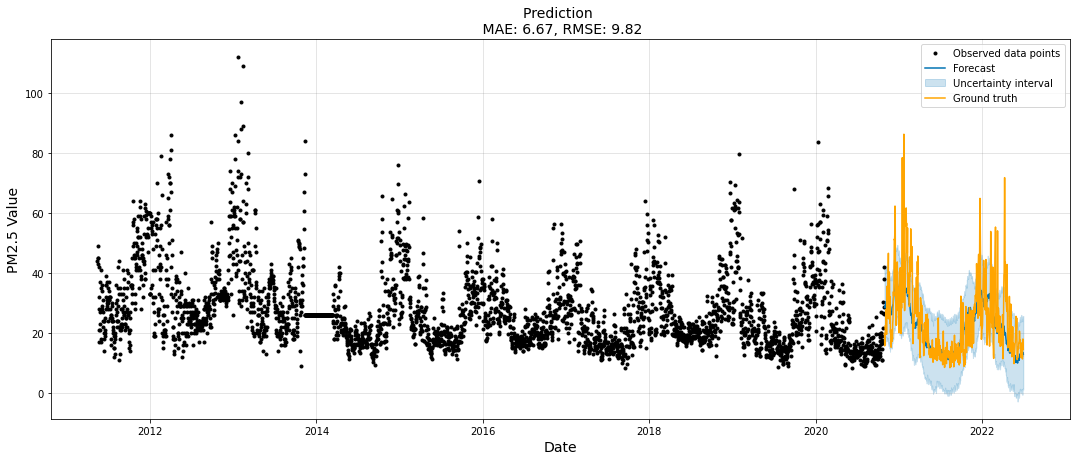

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid_25['ds'], y=y_valid_25['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM2.5 Value', fontsize=14)

plt.show()

In [ ]:
# Train prophet for PM10

# Train the model
model = Prophet()
model.fit(train_10)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid_10)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_10, y_pred.tail(test_size_10)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid_10, y_pred.tail(test_size_10)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphiikivgr/pfq82xdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphiikivgr/kdf1xbwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83291', 'data', 'file=/tmp/tmphiikivgr/pfq82xdd.json', 'init=/tmp/tmphiikivgr/kdf1xbwp.json', 'output', 'file=/tmp/tmphiikivgr/prophet_modelow70fgy5/prophet_model-20230309075329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 15.722201413765804


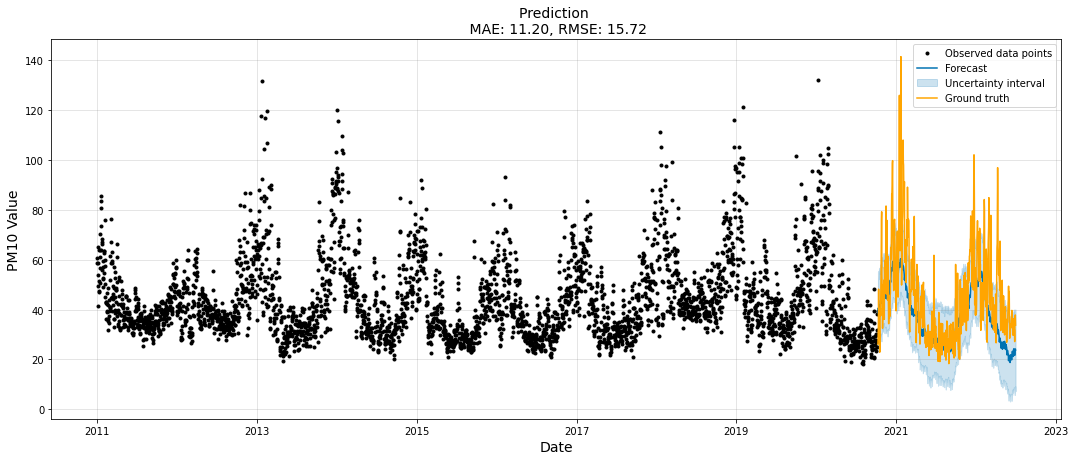

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid_10['ds'], y=y_valid_10['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM10 Value', fontsize=14)

plt.show()

### ARIMA

https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima

What does ARIMA(1, 0, 12) mean?
Specifically for your model, ARIMA(1, 0, 12) means that it you are describing some response variable (Y) by combining a 1st order Auto-Regressive model and a 12th order Moving Average model. A good way to think about it is (AR, I, MA). This makes your model look the following, in simple terms:

Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

The 0 between the 1 and the 12 represents the 'I' part of the model (the Integrative part) and it signifies a model where you're taking the difference between response variable data - this can be done with non-stationary data and it doesn't seem like you're dealing with that, so you can just ignore it.

- It predicted straight line. ARIMA has major problems in detecting seasonality with few long cycles in the data - even if the seasonality is "obvious" for a human.
- To improve this, use AUTO-ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model for PM 2.5
model = ARIMA(y_train_25, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(610) # forecast(x_valid) PM2.5=610  PM10=630

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_25, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_25, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 13.066694367791445


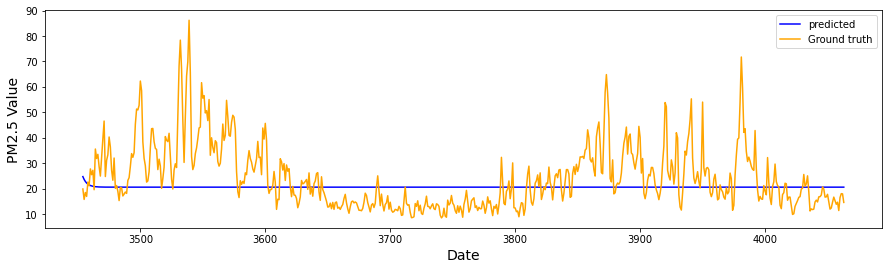

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid_25.index, y=y_pred, ax=ax, color='blue', label='predicted') 
sns.lineplot(x=x_valid_25.index, y=y_valid_25['y'], ax=ax, color='orange', label='Ground truth') 

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM2.5 Value', fontsize=14)

plt.show()

In [ ]:
# Fit model for PM 10
model = ARIMA(y_train_10, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(630) # forecast(x_valid) PM2.5=610  PM10=630

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_10, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_10, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 25.039287853967274


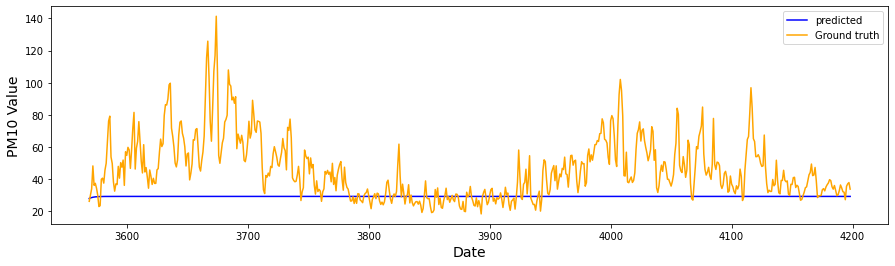

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid_10.index, y=y_pred, ax=ax, color='blue', label='predicted') 
sns.lineplot(x=x_valid_10.index, y=y_valid_10['y'], ax=ax, color='orange', label='Ground truth') 

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM10 Value', fontsize=14)

plt.show()

### AUTO-ARIMA

According to pmdarima's auto_arima
- For PM2.5, ARIMA(3,0,1) is the best
- For PM10, ARIMA(3,0,1) is the best

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# For PM2.5
model = pm.auto_arima(y_train_25, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22833.700, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33353.087, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=22831.871, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29541.054, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22833.756, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22828.418, Time=1.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=22465.614, Time=3.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=22747.485, Time=1.20 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=22466.880, Time=5.90 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=22484.975, Time=4.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22465.452, Time=1.76 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22707.102, Time=0.64 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=22466.825, Time=2.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=22566.728, Time=1.13 sec
 ARIMA(3,0,3)(0,0,0

In [ ]:
# For PM10
model = pm.auto_arima(y_train_10, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=24970.147, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=37545.602, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=24971.948, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33366.005, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=24953.845, Time=2.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=24971.401, Time=0.70 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=24557.732, Time=4.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=24871.455, Time=0.73 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=24559.365, Time=5.80 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=24580.165, Time=5.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=24561.816, Time=1.97 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.94 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=24542.875, Time=7.25 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

In [ ]:
# Let's try to use the AutoARIMA values

# Fit model for PM 2.5
model = ARIMA(y_train_25, order=(3,0,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(610) # forecast(x_valid) PM2.5=610  PM10=630

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_25, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_25, y_pred))

print('RMSE: {}'.format(score_rmse)) 

RMSE: 13.066694367791445


In [ ]:
# Fit model for PM 10
model = ARIMA(y_train_10, order=(3,0,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(630) # forecast(x_valid) PM2.5=610  PM10=630

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_10, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_10, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 20.209582298744095


RMSE of PM2.5 is the same but for PM10 is improved.

### SARIMAX
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# PM25valid 3455-4064
# PM10valid 3570-4199

# For PM2.5
model = SARIMAX(y_train_25, order=(1, 1, 1), seasonal_order=(1,1,1,12))
result = model.fit()

y_pred = result.predict(start=3455, end=4064, dynamic=True)

score_mae = mean_absolute_error(y_valid_25, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_25, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 13.344931990816328


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [ ]:
# For PM10
model = SARIMAX(y_train_10, order=(1, 1, 1), seasonal_order=(1,1,1,12))
result = model.fit()

y_pred = result.predict(start=3570, end=4199, dynamic=True)

score_mae = mean_absolute_error(y_valid_10, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid_10, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 26.787485877704803


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


### LSTM

Keras LSTM - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [ ]:
# FOR PM2.5

from sklearn.preprocessing import MinMaxScaler

data = uni_pm25.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[0.34405145],
       [0.35369775],
       [0.35369775],
       [0.39228296],
       [0.33440514],
       [0.18971061],
       [0.1221865 ],
       [0.08360129],
       [0.22829582],
       [0.32475884]])

In [ ]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size_25-look_back,:], scaled_data[train_size_25-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

3350 610


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
3350/3350 [==============================] - 40s 10ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 2/5
3350/3350 [==============================] - 32s 9ms/step - loss: 0.0054 - val_loss: 0.0064
Epoch 3/5
3350/3350 [==============================] - 35s 11ms/step - loss: 0.0048 - val_loss: 0.0038
Epoch 4/5
3350/3350 [==============================] - 32s 9ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 5/5
3350/3350 [==============================] - 32s 9ms/step - loss: 0.0044 - val_loss: 0.0036
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 1, 256)            316416    
                                                                 
 lstm_18 (LSTM)              (None, 128)               197120    
                                                                 
 dense_12 (Dense)            (None, 25)                3225      
    

In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(1, -1))

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(1, -1))

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

20/20 [==============================] - 0s 4ms/step
RMSE: 6.239749894107992


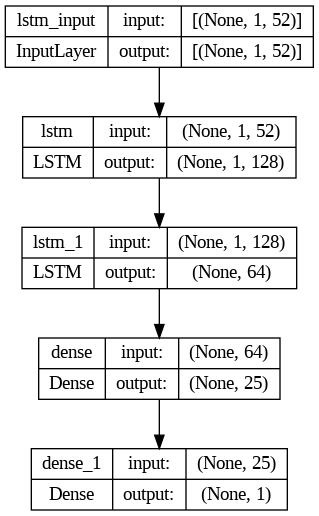

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot_pm25.png', show_shapes=True, show_layer_names=True)

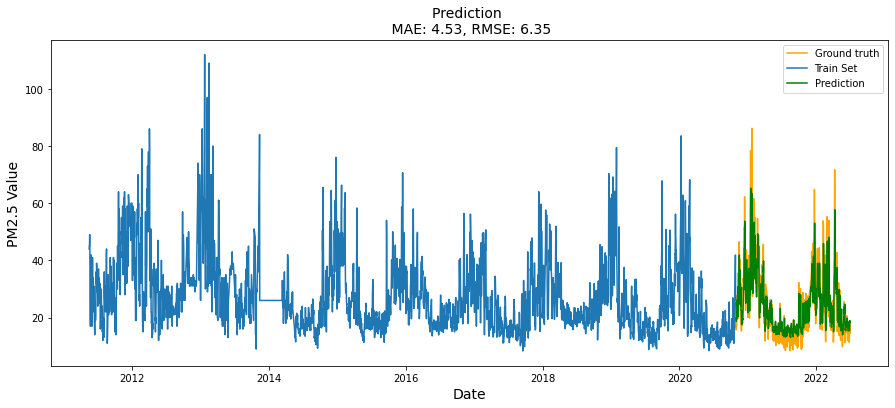

In [ ]:
x_train_ticks = uni_pm25.head(train_size_25)['ds']
y_train = uni_pm25.head(train_size_25)['y']
x_test_ticks = uni_pm25.tail(test_size_25)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') 
sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') 
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM2.5 Value', fontsize=14)

plt.show()

In [ ]:
# FOR PM10

from sklearn.preprocessing import MinMaxScaler

data = uni_pm10.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[0.34434282],
       [0.32757453],
       [0.37838753],
       [0.32808266],
       [0.28946477],
       [0.2528794 ],
       [0.18834688],
       [0.23509485],
       [0.26761518],
       [0.23428184]])

In [ ]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size_10-look_back,:], scaled_data[train_size_10-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

3465 630


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
3465/3465 [==============================] - 42s 10ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 2/5
3465/3465 [==============================] - 32s 9ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 3/5
3465/3465 [==============================] - 31s 9ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 4/5
3465/3465 [==============================] - 33s 10ms/step - loss: 0.0048 - val_loss: 0.0071
Epoch 5/5
3465/3465 [==============================] - 31s 9ms/step - loss: 0.0046 - val_loss: 0.0063
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 1, 256)            316416    
                                                                 
 lstm_20 (LSTM)              (None, 128)               197120    
                                                                 
 dense_14 (Dense)            (None, 25)                3225      
    

In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(1, -1))

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(1, -1))

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

20/20 [==============================] - 0s 4ms/step
RMSE: 9.757848307452873


In [ ]:
plot_model(model, to_file='model_plot_pm10.png', show_shapes=True, show_layer_names=True)

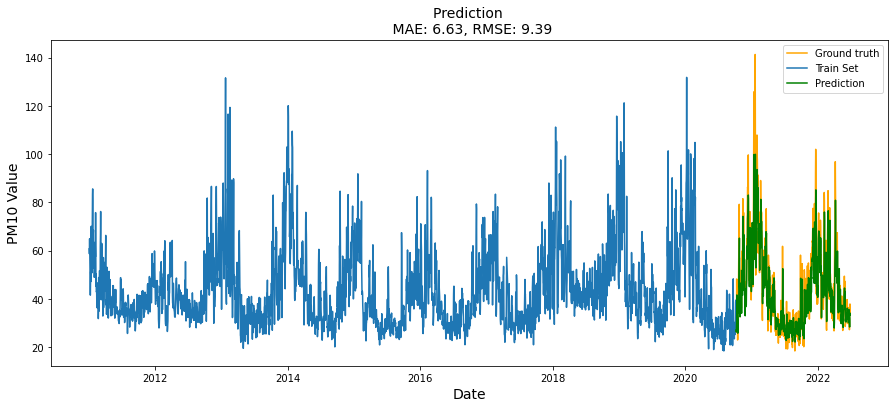

In [ ]:
x_train_ticks = uni_pm10.head(train_size_10)['ds']
y_train = uni_pm10.head(train_size_10)['y']
x_test_ticks = uni_pm10.tail(test_size_10)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') 
sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') 
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM10 Value', fontsize=14)

plt.show()

## Conclusion for models

RMSE Score

Prophet
- PM2.5: 9.822560244452413
- PM10: 15.722201413765804

ARIMA 
- PM2.5: 13.066694367791445
- PM10: 25.039287853967274

Auto-ARIMA
- PM2.5: 13.066694367791445
- PM10: 20.209582298744095

SARIMAX
- PM2.5: 13.344931990816328
- PM10: 26.787485877704803

LSTM
- PM2.5: 6.298737686004885
- PM10: 9.22041940574204

In conclusion, LSTM is the best model for PM 2.5 and PM 10 univariate time-series data.